<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

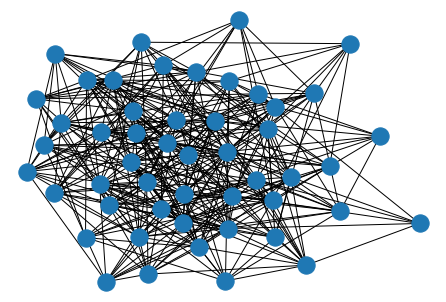

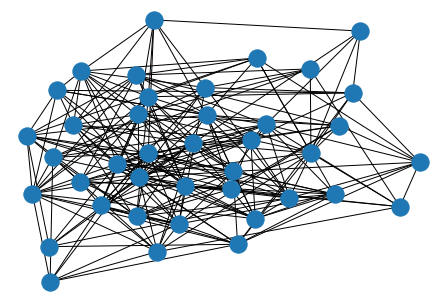

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 1]
 [0 1 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [1 1 0 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304]
[199, 422, 684, 926, 894, 766, 604, 451, 381, 354, 315, 274, 201, 145, 88, 43, 20, 8, 4, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 422, 684, 926, 1093, 1188, 1288, 1377, 1474, 1542, 1603, 1651, 1675, 1687, 1691, 1694, 1695, 1695, 1695, 1696]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304]]
[[], [199, 422, 684, 926, 894, 766, 604, 451, 381, 354, 315, 274, 201, 145, 88, 43, 20, 8, 4, 2, 1, 1, 1, 0]]
[[], [0, 0, 0, 0, 199, 422, 684, 926, 1093, 1188, 1288, 1377, 1474, 1542, 1603, 1651, 1675, 1687, 1691, 1694, 1695, 1695, 1695, 1696]]


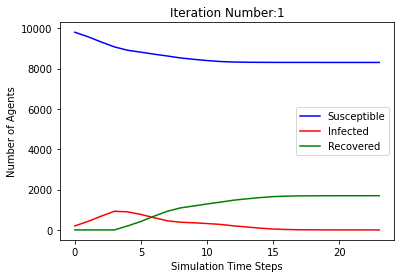

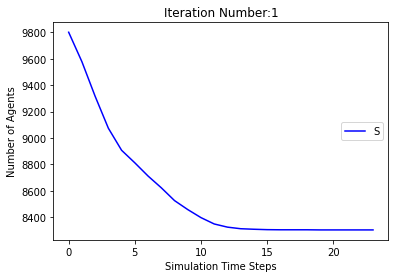

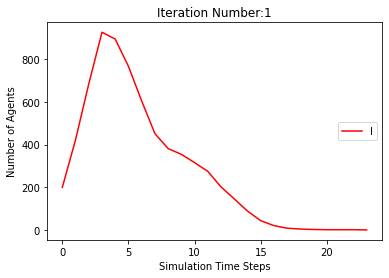

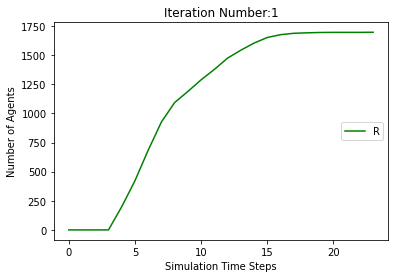

[9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188]
[199, 398, 616, 868, 891, 817, 703, 554, 415, 361, 312, 255, 208, 162, 135, 107, 83, 69, 44, 28, 16, 5, 2, 0]
[0, 0, 0, 0, 199, 398, 616, 868, 1090, 1215, 1319, 1422, 1505, 1576, 1631, 1677, 1713, 1738, 1766, 1784, 1796, 1807, 1810, 1812]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188]]
[[], [199, 422, 684, 926, 894, 766, 604, 451, 381, 354, 315, 274, 201, 145, 88, 43, 20, 8, 4, 2, 1, 1, 1, 0], [199, 398, 616, 868, 891, 817, 703, 554, 415, 361, 312, 255, 208, 162, 135, 107, 83, 69, 44, 28, 16, 5, 2, 0]]
[[], [0, 0, 0, 0, 199, 422, 684, 926, 1093, 1188, 1288, 1377, 1474, 1542, 1603, 1651, 1675, 1687, 

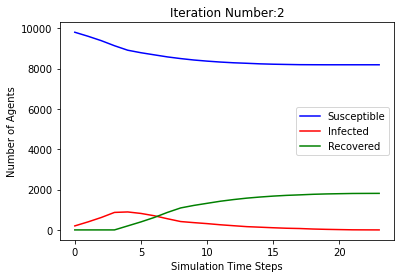

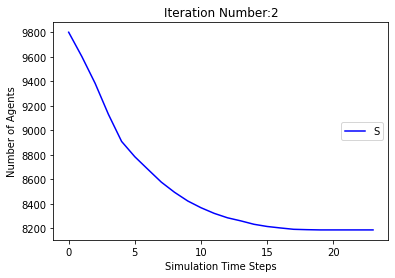

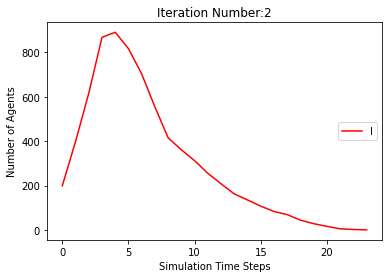

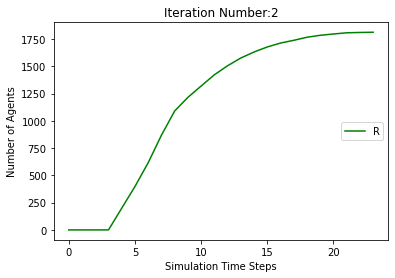

[9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445]
[199, 387, 664, 928, 916, 824, 632, 438, 310, 260, 206, 164, 114, 77, 51, 25, 16, 7, 2, 0]
[0, 0, 0, 0, 199, 387, 664, 928, 1115, 1211, 1296, 1366, 1425, 1471, 1502, 1530, 1539, 1548, 1553, 1555]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445]]
[[], [199, 422, 684, 926, 894, 766, 604, 451, 381, 354, 315, 274, 201, 145, 88, 43, 20, 8, 4, 2, 1, 1, 1, 0], [199, 398, 616, 868, 891, 817, 703, 554, 415, 361, 312, 255, 208, 162, 135, 107, 83, 69, 44, 28, 16, 5, 2, 0], [199, 387, 664, 928, 916, 824, 632, 438, 31

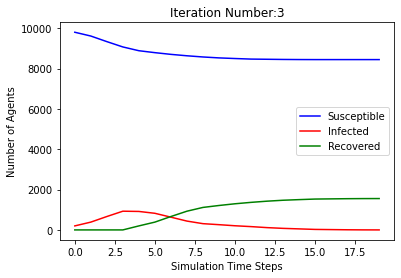

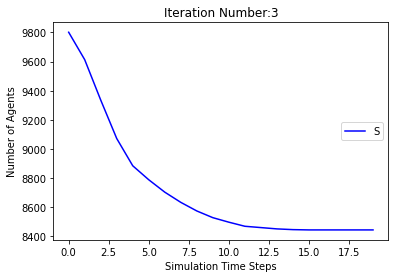

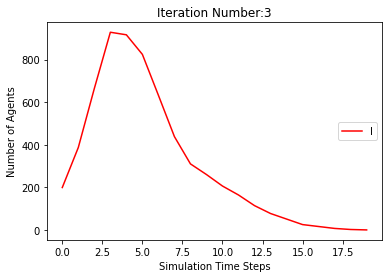

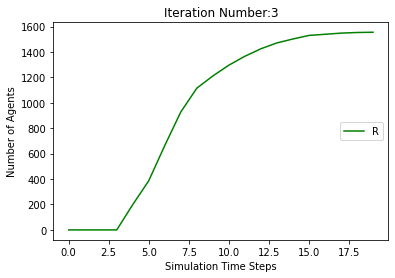

[9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441]
[199, 397, 661, 936, 906, 818, 661, 467, 355, 289, 197, 131, 79, 38, 27, 16, 13, 12, 10, 8, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 199, 397, 661, 936, 1105, 1215, 1322, 1403, 1460, 1504, 1519, 1534, 1539, 1542, 1546, 1550, 1552, 1554, 1556, 1558, 1559]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441]]
[[], [199, 422, 684, 926, 894, 766, 

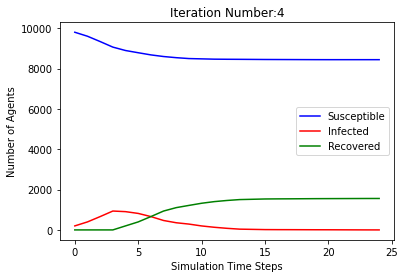

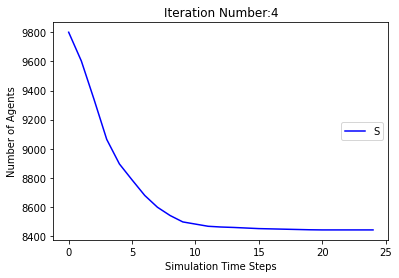

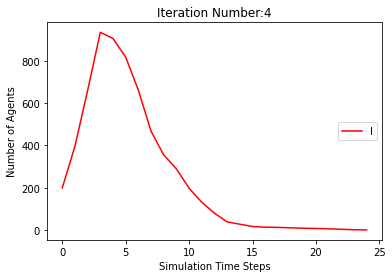

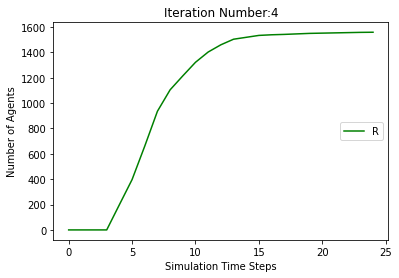

[9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8098, 8095, 8092, 8091, 8088, 8087, 8086, 8086, 8086, 8086, 8086]
[199, 371, 644, 906, 896, 861, 707, 549, 448, 392, 326, 263, 210, 163, 134, 110, 96, 77, 63, 56, 44, 38, 31, 24, 16, 10, 8, 6, 5, 2, 1, 0]
[0, 0, 0, 0, 199, 371, 644, 906, 1095, 1232, 1351, 1455, 1543, 1624, 1677, 1718, 1753, 1787, 1811, 1828, 1849, 1864, 1874, 1884, 1893, 1902, 1905, 1908, 1909, 1912, 1913, 1914]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466,

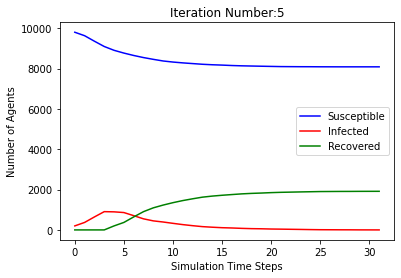

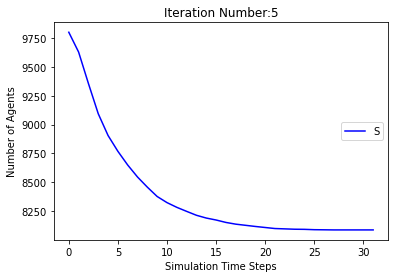

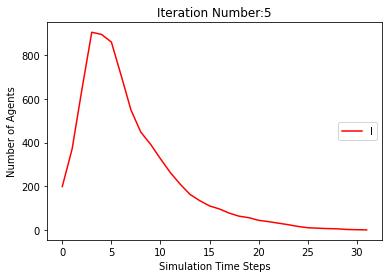

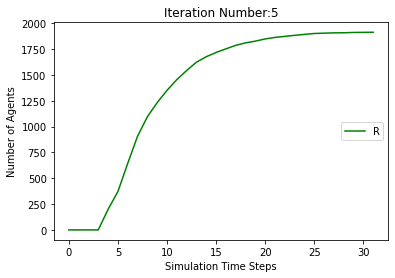

[9801, 9602, 9336, 9084, 8901, 8813, 8757, 8710, 8670, 8650, 8635, 8622, 8615, 8609, 8608, 8606, 8605, 8604, 8604, 8604, 8604, 8604]
[199, 398, 664, 916, 900, 789, 579, 374, 231, 163, 122, 88, 55, 41, 27, 16, 10, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 199, 398, 664, 916, 1099, 1187, 1243, 1290, 1330, 1350, 1365, 1378, 1385, 1391, 1392, 1394, 1395, 1396]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213,

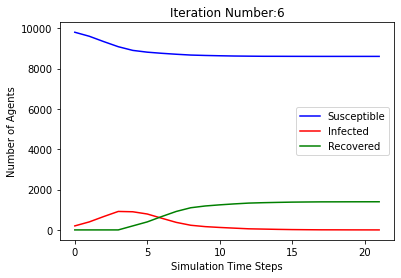

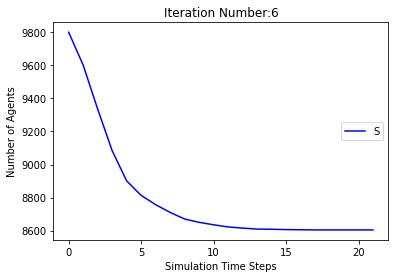

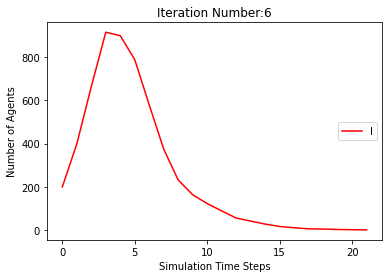

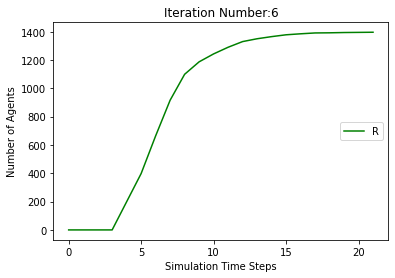

[9801, 9614, 9349, 9098, 8899, 8784, 8686, 8592, 8522, 8448, 8383, 8328, 8299, 8278, 8265, 8255, 8248, 8241, 8237, 8235, 8233, 8232, 8232, 8231, 8230, 8229, 8228, 8228, 8228, 8228, 8228]
[199, 386, 651, 902, 902, 830, 663, 506, 377, 336, 303, 264, 223, 170, 118, 73, 51, 37, 28, 20, 15, 9, 5, 4, 3, 3, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 199, 386, 651, 902, 1101, 1216, 1314, 1408, 1478, 1552, 1617, 1672, 1701, 1722, 1735, 1745, 1752, 1759, 1763, 1765, 1767, 1768, 1768, 1769, 1770, 1771, 1772]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 84

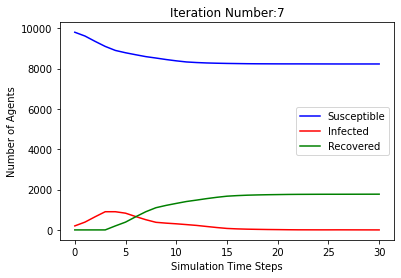

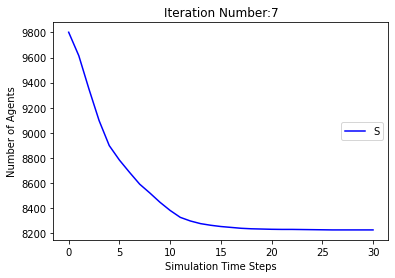

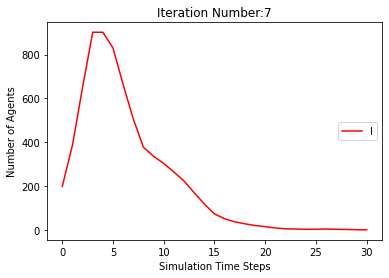

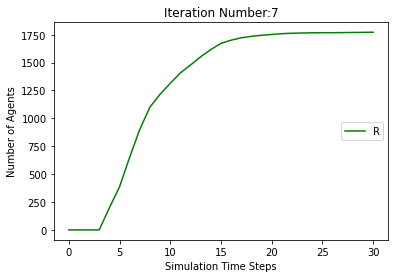

[9801, 9616, 9374, 9147, 8954, 8833, 8737, 8665, 8611, 8565, 8515, 8471, 8443, 8424, 8408, 8395, 8390, 8387, 8385, 8381, 8375, 8372, 8365, 8361, 8361, 8358, 8356, 8356, 8352, 8352, 8352, 8352, 8352]
[199, 384, 626, 853, 847, 783, 637, 482, 343, 268, 222, 194, 168, 141, 107, 76, 53, 37, 23, 14, 15, 15, 20, 20, 14, 14, 9, 5, 9, 6, 4, 4, 0]
[0, 0, 0, 0, 199, 384, 626, 853, 1046, 1167, 1263, 1335, 1389, 1435, 1485, 1529, 1557, 1576, 1592, 1605, 1610, 1613, 1615, 1619, 1625, 1628, 1635, 1639, 1639, 1642, 1644, 1644, 1648]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 849

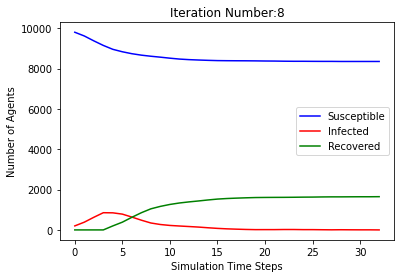

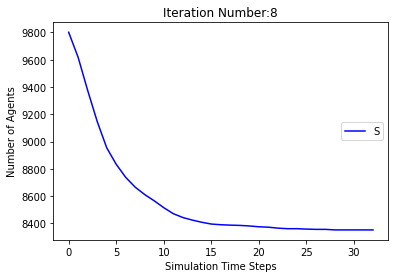

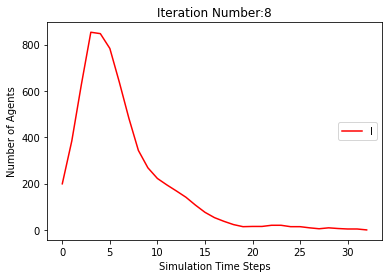

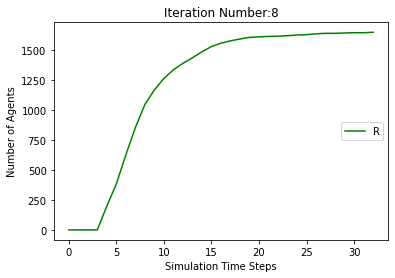

[9801, 9616, 9338, 9082, 8897, 8796, 8715, 8656, 8599, 8552, 8517, 8497, 8481, 8472, 8469, 8467, 8467, 8467, 8467, 8467]
[199, 384, 662, 918, 904, 820, 623, 426, 298, 244, 198, 159, 118, 80, 48, 30, 14, 5, 2, 0]
[0, 0, 0, 0, 199, 384, 662, 918, 1103, 1204, 1285, 1344, 1401, 1448, 1483, 1503, 1519, 1528, 1531, 1533]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 812

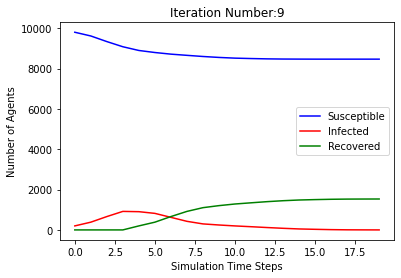

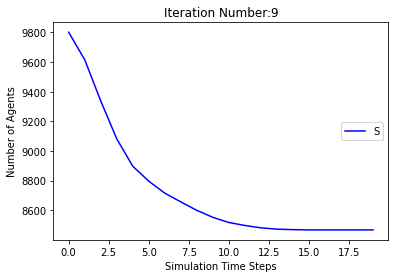

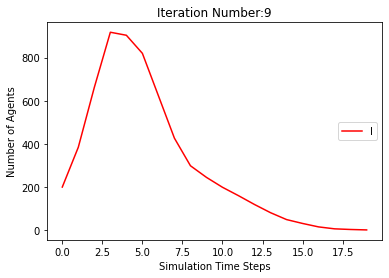

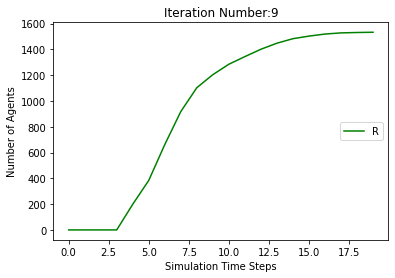

[9801, 9596, 9335, 9086, 8899, 8810, 8725, 8656, 8584, 8539, 8513, 8498, 8481, 8470, 8467, 8464, 8462, 8458, 8456, 8456, 8456, 8456, 8456]
[199, 404, 665, 914, 902, 786, 610, 430, 315, 271, 212, 158, 103, 69, 46, 34, 19, 12, 11, 8, 6, 2, 0]
[0, 0, 0, 0, 199, 404, 665, 914, 1101, 1190, 1275, 1344, 1416, 1461, 1487, 1502, 1519, 1530, 1533, 1536, 1538, 1542, 1544]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323

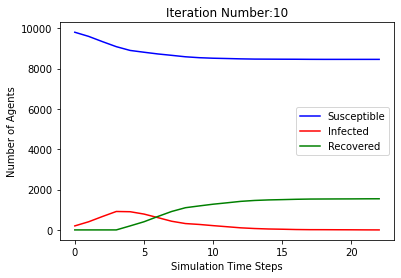

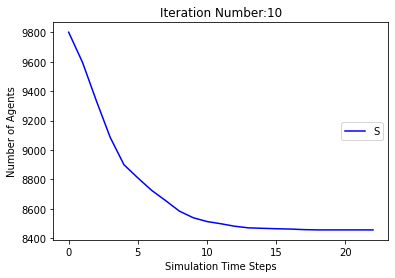

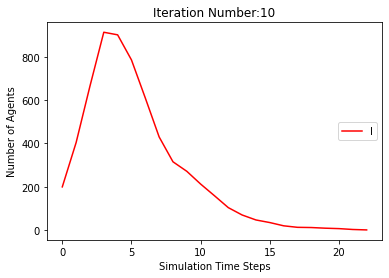

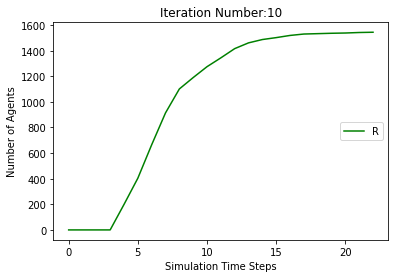

[9801, 9584, 9328, 9095, 8936, 8848, 8791, 8751, 8723, 8709, 8690, 8679, 8668, 8659, 8653, 8650, 8650, 8649, 8649, 8649, 8649, 8649]
[199, 416, 672, 905, 865, 736, 537, 344, 213, 139, 101, 72, 55, 50, 37, 29, 18, 10, 4, 1, 1, 0]
[0, 0, 0, 0, 199, 416, 672, 905, 1064, 1152, 1209, 1249, 1277, 1291, 1310, 1321, 1332, 1341, 1347, 1350, 1350, 1351]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213

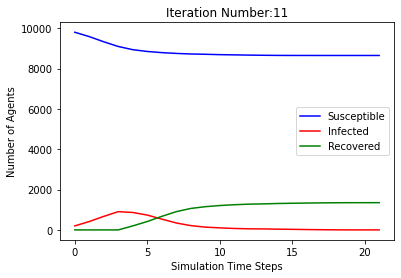

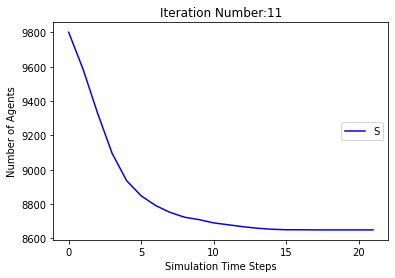

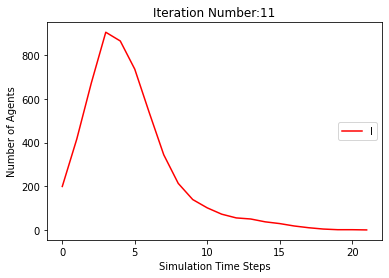

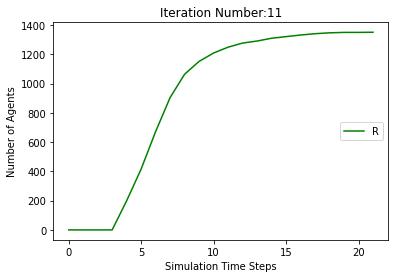

[9801, 9615, 9372, 9111, 8942, 8853, 8779, 8713, 8664, 8623, 8587, 8565, 8561, 8557, 8555, 8554, 8554, 8554, 8554, 8554]
[199, 385, 628, 889, 859, 762, 593, 398, 278, 230, 192, 148, 103, 66, 32, 11, 7, 3, 1, 0]
[0, 0, 0, 0, 199, 385, 628, 889, 1058, 1147, 1221, 1287, 1336, 1377, 1413, 1435, 1439, 1443, 1445, 1446]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126

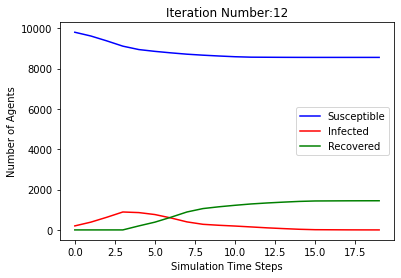

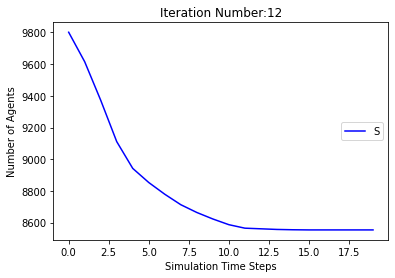

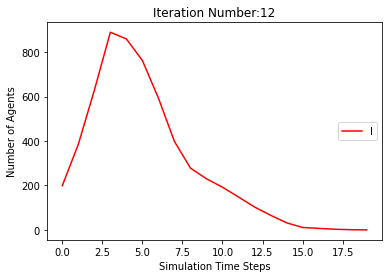

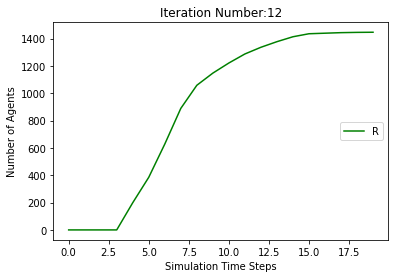

[9801, 9611, 9366, 9106, 8917, 8804, 8681, 8553, 8448, 8367, 8299, 8256, 8200, 8153, 8121, 8101, 8083, 8068, 8058, 8053, 8049, 8048, 8048, 8048, 8048, 8048]
[199, 389, 634, 894, 884, 807, 685, 553, 469, 437, 382, 297, 248, 214, 178, 155, 117, 85, 63, 48, 34, 20, 10, 5, 1, 0]
[0, 0, 0, 0, 199, 389, 634, 894, 1083, 1196, 1319, 1447, 1552, 1633, 1701, 1744, 1800, 1847, 1879, 1899, 1917, 1932, 1942, 1947, 1951, 1952]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629,

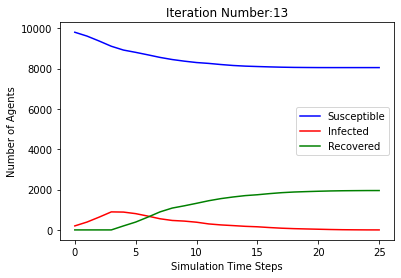

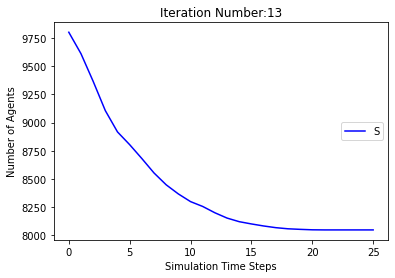

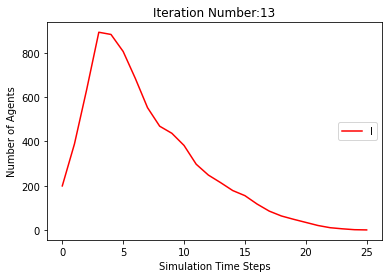

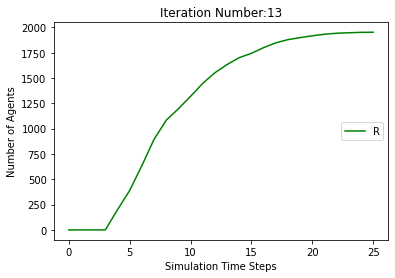

[9801, 9622, 9360, 9086, 8904, 8820, 8737, 8671, 8607, 8559, 8523, 8495, 8472, 8466, 8464, 8462, 8462, 8460, 8458, 8458, 8458, 8458, 8458]
[199, 378, 640, 914, 897, 802, 623, 415, 297, 261, 214, 176, 135, 93, 59, 33, 10, 6, 6, 4, 4, 2, 0]
[0, 0, 0, 0, 199, 378, 640, 914, 1096, 1180, 1263, 1329, 1393, 1441, 1477, 1505, 1528, 1534, 1536, 1538, 1538, 1540, 1542]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 

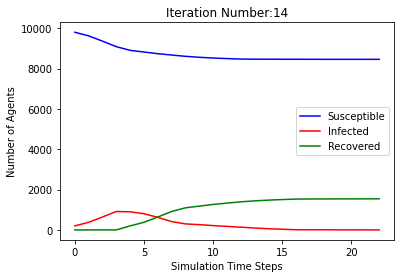

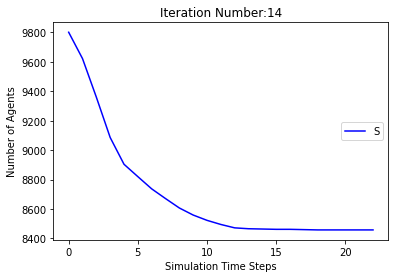

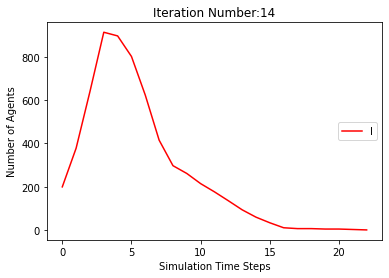

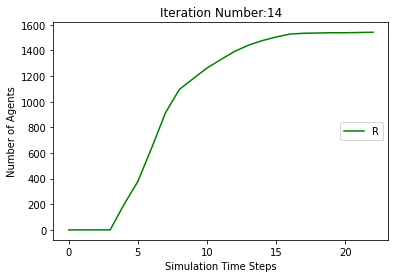

[9801, 9628, 9357, 9127, 8949, 8856, 8787, 8723, 8678, 8655, 8621, 8604, 8591, 8584, 8580, 8577, 8577, 8577, 8577, 8577]
[199, 372, 643, 873, 852, 772, 570, 404, 271, 201, 166, 119, 87, 71, 41, 27, 14, 7, 3, 0]
[0, 0, 0, 0, 199, 372, 643, 873, 1051, 1144, 1213, 1277, 1322, 1345, 1379, 1396, 1409, 1416, 1420, 1423]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126

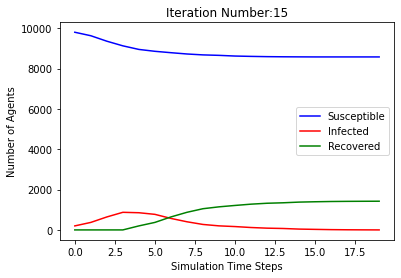

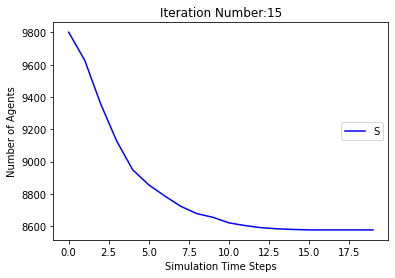

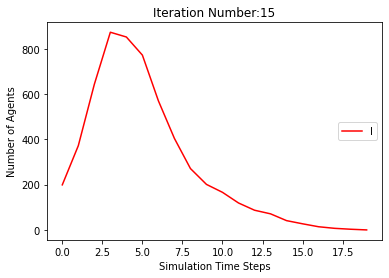

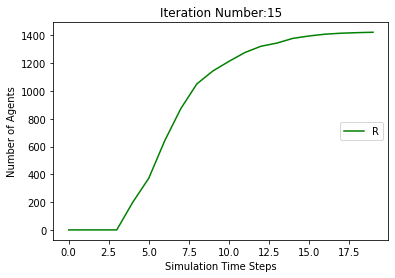

[9801, 9612, 9355, 9094, 8917, 8835, 8772, 8702, 8641, 8603, 8561, 8537, 8524, 8517, 8515, 8515, 8515, 8515, 8515]
[199, 388, 645, 906, 884, 777, 583, 392, 276, 232, 211, 165, 117, 86, 46, 22, 9, 2, 0]
[0, 0, 0, 0, 199, 388, 645, 906, 1083, 1165, 1228, 1298, 1359, 1397, 1439, 1463, 1476, 1483, 1485]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8

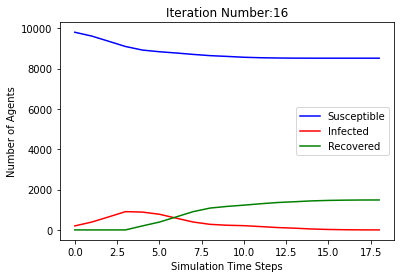

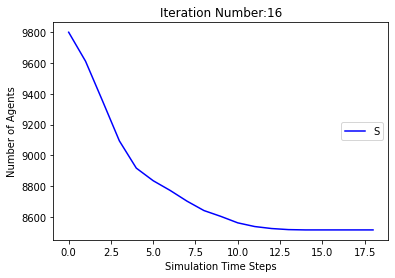

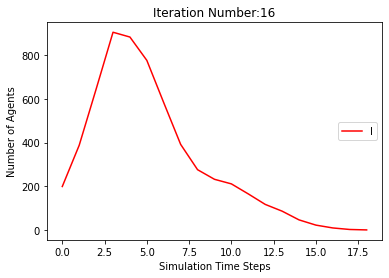

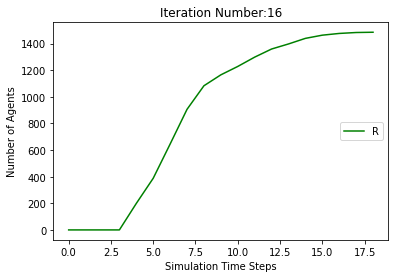

[9801, 9607, 9327, 9081, 8905, 8801, 8726, 8664, 8613, 8578, 8548, 8527, 8512, 8497, 8485, 8477, 8472, 8470, 8467, 8466, 8465, 8463, 8463, 8463, 8462, 8462, 8462, 8462, 8462]
[199, 393, 673, 919, 896, 806, 601, 417, 292, 223, 178, 137, 101, 81, 63, 50, 40, 27, 18, 11, 7, 7, 4, 3, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 393, 673, 919, 1095, 1199, 1274, 1336, 1387, 1422, 1452, 1473, 1488, 1503, 1515, 1523, 1528, 1530, 1533, 1534, 1535, 1537, 1537, 1537, 1538]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441,

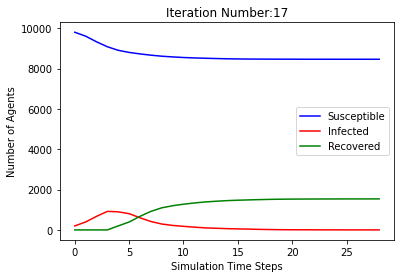

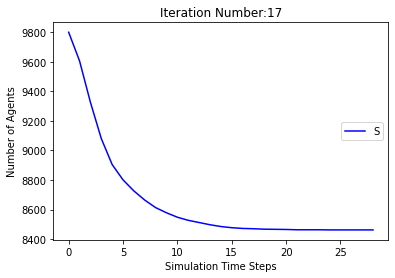

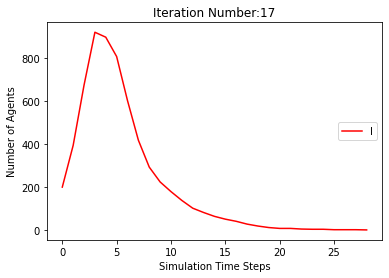

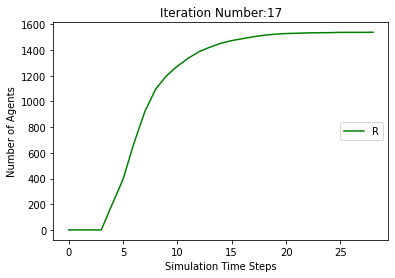

[9801, 9598, 9332, 9077, 8887, 8776, 8689, 8620, 8575, 8517, 8460, 8434, 8405, 8375, 8361, 8344, 8338, 8330, 8328, 8328, 8326, 8326, 8326, 8325, 8323, 8323, 8323, 8323, 8323]
[199, 402, 668, 923, 914, 822, 643, 457, 312, 259, 229, 186, 170, 142, 99, 90, 67, 45, 33, 16, 12, 4, 2, 3, 3, 3, 3, 2, 0]
[0, 0, 0, 0, 199, 402, 668, 923, 1113, 1224, 1311, 1380, 1425, 1483, 1540, 1566, 1595, 1625, 1639, 1656, 1662, 1670, 1672, 1672, 1674, 1674, 1674, 1675, 1677]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 844

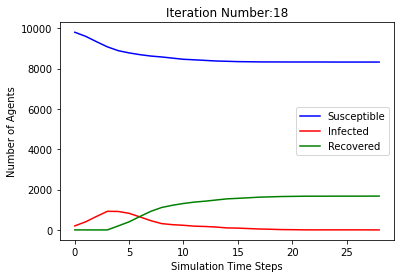

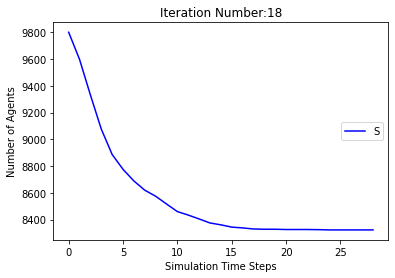

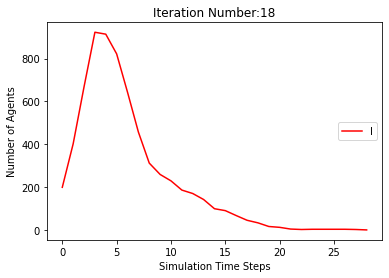

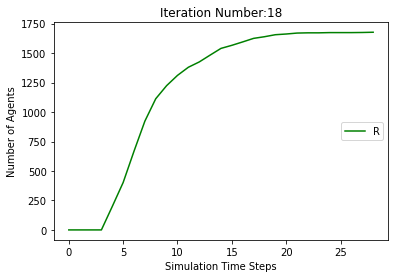

[9801, 9599, 9343, 9067, 8890, 8801, 8722, 8664, 8615, 8588, 8547, 8511, 8494, 8483, 8480, 8476, 8473, 8468, 8465, 8462, 8461, 8461, 8461, 8461, 8461]
[199, 401, 657, 933, 911, 798, 621, 403, 275, 213, 175, 153, 121, 105, 67, 35, 21, 15, 15, 14, 12, 7, 4, 1, 0]
[0, 0, 0, 0, 199, 401, 657, 933, 1110, 1199, 1278, 1336, 1385, 1412, 1453, 1489, 1506, 1517, 1520, 1524, 1527, 1532, 1535, 1538, 1539]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8

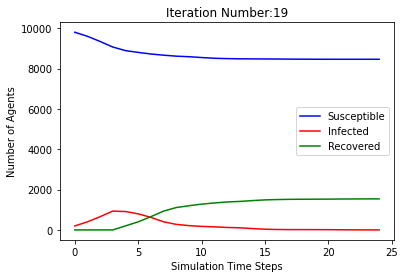

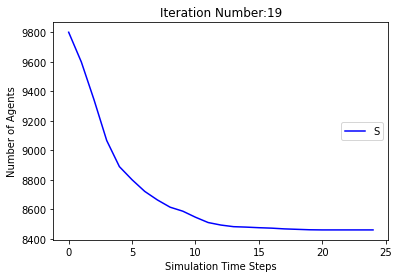

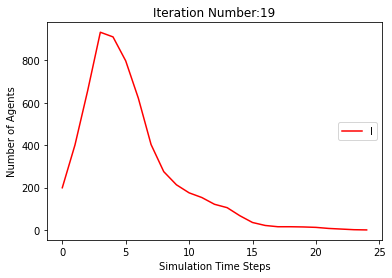

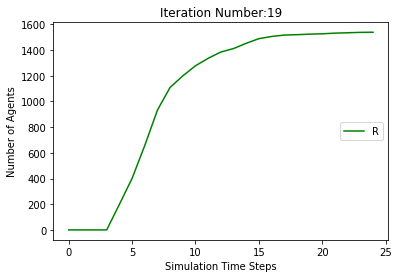

[9801, 9599, 9353, 9103, 8928, 8805, 8719, 8648, 8575, 8517, 8477, 8445, 8419, 8400, 8384, 8366, 8359, 8355, 8355, 8354, 8353, 8353, 8353, 8353, 8353]
[199, 401, 647, 897, 873, 794, 634, 455, 353, 288, 242, 203, 156, 117, 93, 79, 60, 45, 29, 12, 6, 2, 2, 1, 0]
[0, 0, 0, 0, 199, 401, 647, 897, 1072, 1195, 1281, 1352, 1425, 1483, 1523, 1555, 1581, 1600, 1616, 1634, 1641, 1645, 1645, 1646, 1647]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 87

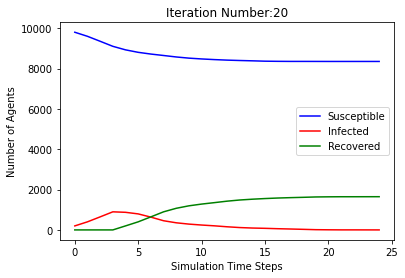

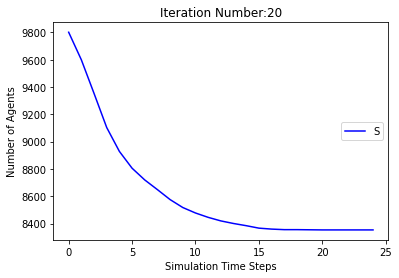

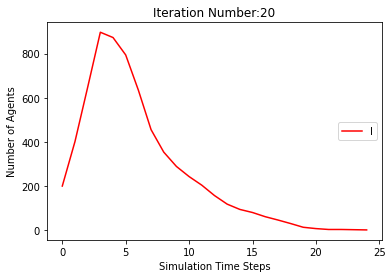

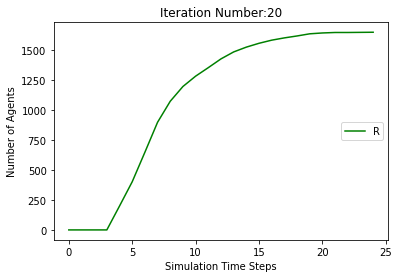

[9801, 9607, 9355, 9106, 8907, 8800, 8729, 8662, 8598, 8530, 8477, 8418, 8377, 8352, 8332, 8321, 8313, 8306, 8303, 8303, 8303, 8303, 8303]
[199, 393, 645, 894, 894, 807, 626, 444, 309, 270, 252, 244, 221, 178, 145, 97, 64, 46, 29, 18, 10, 3, 0]
[0, 0, 0, 0, 199, 393, 645, 894, 1093, 1200, 1271, 1338, 1402, 1470, 1523, 1582, 1623, 1648, 1668, 1679, 1687, 1694, 1697]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 

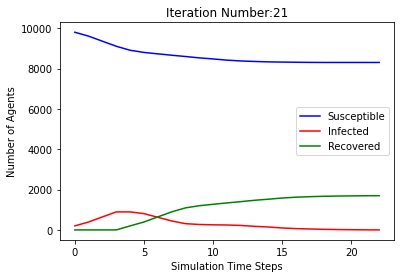

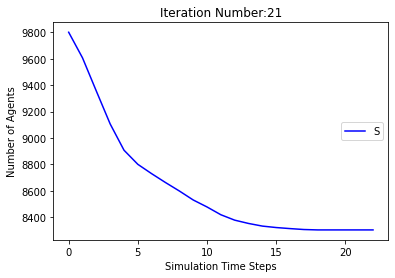

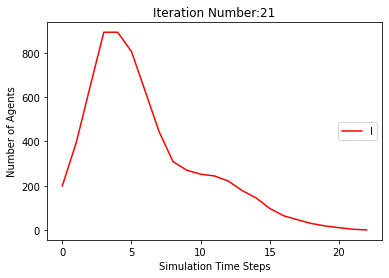

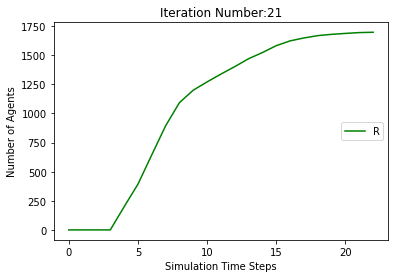

[9801, 9609, 9348, 9110, 8945, 8855, 8780, 8707, 8652, 8610, 8587, 8575, 8570, 8567, 8564, 8561, 8559, 8558, 8558, 8558, 8558, 8558]
[199, 391, 652, 890, 856, 754, 568, 403, 293, 245, 193, 132, 82, 43, 23, 14, 11, 9, 6, 3, 1, 0]
[0, 0, 0, 0, 199, 391, 652, 890, 1055, 1145, 1220, 1293, 1348, 1390, 1413, 1425, 1430, 1433, 1436, 1439, 1441, 1442]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213

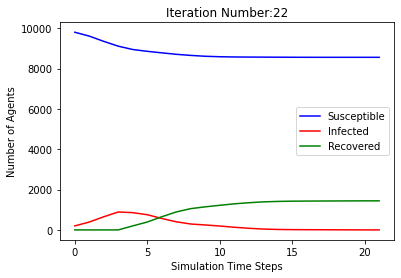

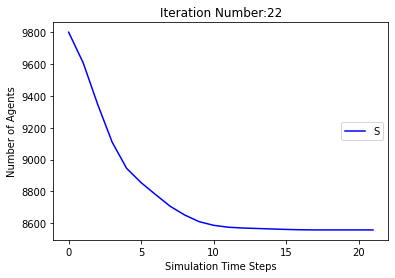

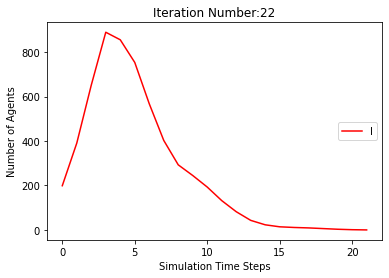

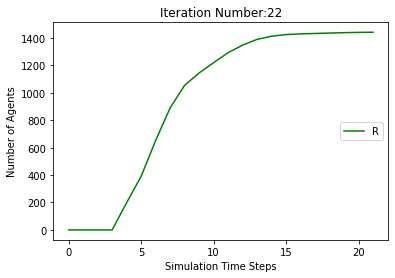

[9801, 9600, 9335, 9071, 8892, 8786, 8711, 8653, 8597, 8554, 8529, 8508, 8494, 8481, 8476, 8472, 8470, 8470, 8470, 8470, 8470]
[199, 400, 665, 929, 909, 814, 624, 418, 295, 232, 182, 145, 103, 73, 53, 36, 24, 11, 6, 2, 0]
[0, 0, 0, 0, 199, 400, 665, 929, 1108, 1214, 1289, 1347, 1403, 1446, 1471, 1492, 1506, 1519, 1524, 1528, 1530]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172,

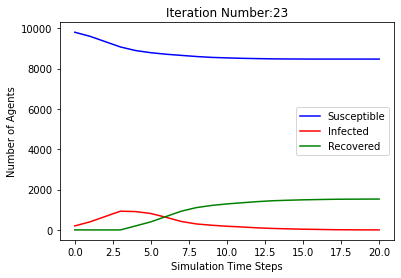

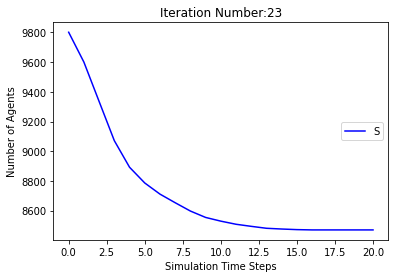

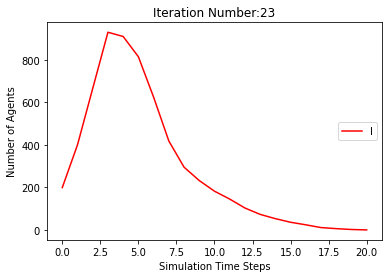

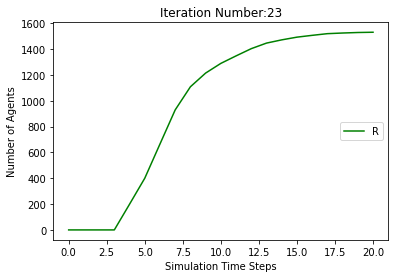

[9801, 9610, 9358, 9107, 8923, 8801, 8711, 8633, 8565, 8500, 8435, 8368, 8304, 8265, 8229, 8201, 8186, 8166, 8153, 8144, 8136, 8129, 8128, 8127, 8123, 8121, 8121, 8121, 8120, 8120, 8120, 8120, 8119, 8119, 8119, 8119, 8119]
[199, 390, 642, 893, 878, 809, 647, 474, 358, 301, 276, 265, 261, 235, 206, 167, 118, 99, 76, 57, 50, 37, 25, 17, 13, 8, 7, 6, 3, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 390, 642, 893, 1077, 1199, 1289, 1367, 1435, 1500, 1565, 1632, 1696, 1735, 1771, 1799, 1814, 1834, 1847, 1856, 1864, 1871, 1872, 1873, 1877, 1879, 1879, 1879, 1880, 1880, 1880, 1880, 1881]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445

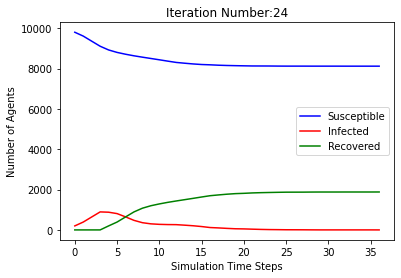

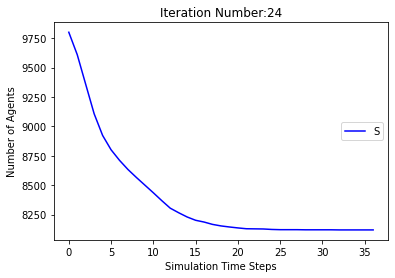

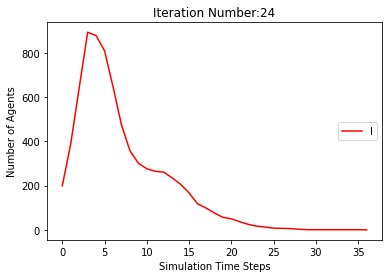

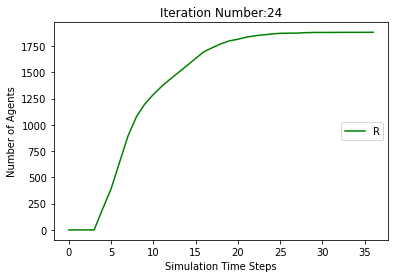

[9801, 9592, 9326, 9112, 8936, 8845, 8777, 8731, 8680, 8633, 8596, 8570, 8542, 8518, 8498, 8480, 8465, 8448, 8435, 8419, 8406, 8399, 8397, 8396, 8393, 8393, 8393, 8393, 8393]
[199, 408, 674, 888, 865, 747, 549, 381, 256, 212, 181, 161, 138, 115, 98, 90, 77, 70, 63, 61, 59, 49, 38, 23, 13, 6, 4, 3, 0]
[0, 0, 0, 0, 199, 408, 674, 888, 1064, 1155, 1223, 1269, 1320, 1367, 1404, 1430, 1458, 1482, 1502, 1520, 1535, 1552, 1565, 1581, 1594, 1601, 1603, 1604, 1607]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442,

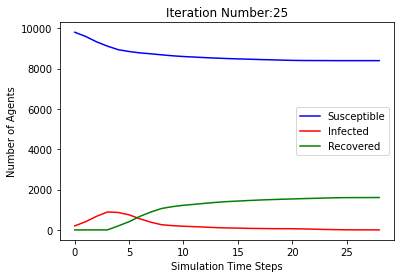

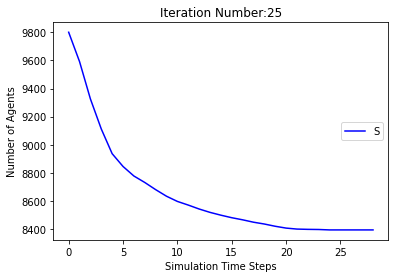

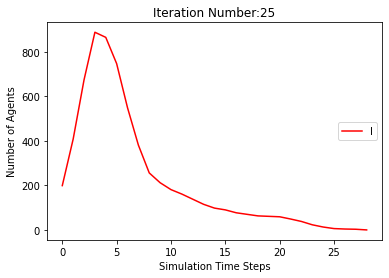

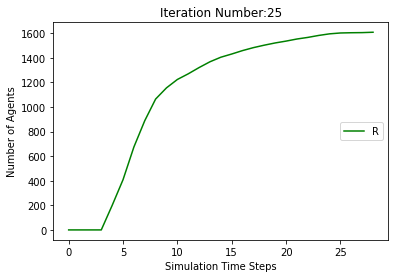

[9801, 9613, 9346, 9081, 8903, 8807, 8722, 8649, 8588, 8537, 8493, 8460, 8442, 8420, 8415, 8412, 8410, 8409, 8408, 8406, 8406, 8406, 8406, 8406]
[199, 387, 654, 919, 898, 806, 624, 432, 315, 270, 229, 189, 146, 117, 78, 48, 32, 11, 7, 6, 4, 3, 2, 0]
[0, 0, 0, 0, 199, 387, 654, 919, 1097, 1193, 1278, 1351, 1412, 1463, 1507, 1540, 1558, 1580, 1585, 1588, 1590, 1591, 1592, 1594]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8

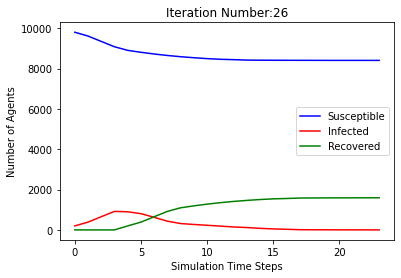

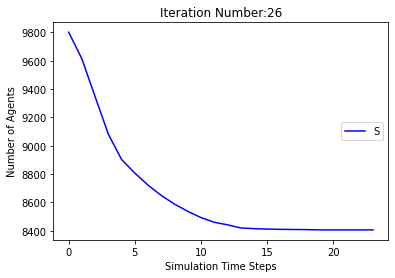

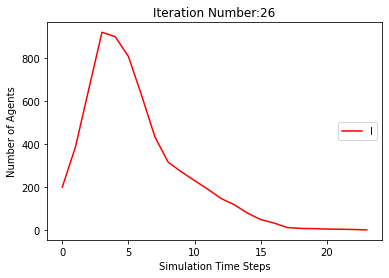

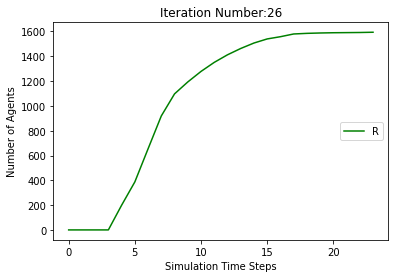

[9801, 9624, 9371, 9122, 8925, 8835, 8769, 8725, 8684, 8659, 8630, 8611, 8597, 8592, 8591, 8589, 8586, 8586, 8586, 8586, 8586]
[199, 376, 629, 878, 876, 789, 602, 397, 241, 176, 139, 114, 87, 67, 39, 22, 11, 6, 5, 3, 0]
[0, 0, 0, 0, 199, 376, 629, 878, 1075, 1165, 1231, 1275, 1316, 1341, 1370, 1389, 1403, 1408, 1409, 1411, 1414]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8

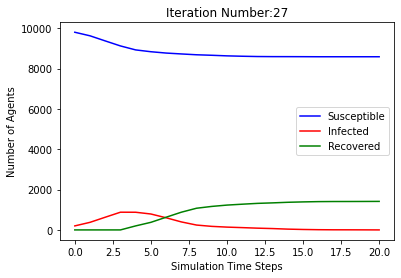

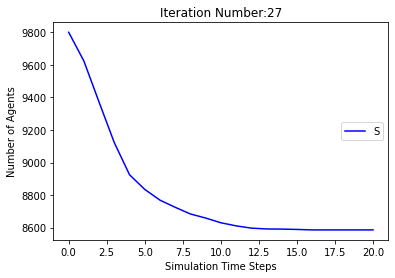

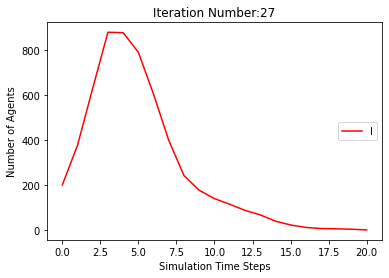

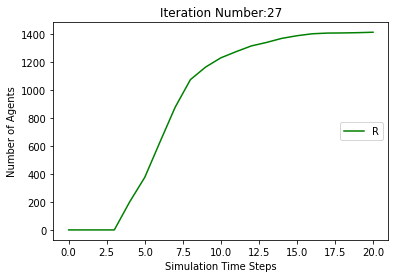

[9801, 9618, 9350, 9108, 8915, 8805, 8733, 8695, 8666, 8630, 8598, 8571, 8556, 8540, 8523, 8518, 8515, 8513, 8513, 8513, 8513, 8513]
[199, 382, 650, 892, 886, 813, 617, 413, 249, 175, 135, 124, 110, 90, 75, 53, 41, 27, 10, 5, 2, 0]
[0, 0, 0, 0, 199, 382, 650, 892, 1085, 1195, 1267, 1305, 1334, 1370, 1402, 1429, 1444, 1460, 1477, 1482, 1485, 1487]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8

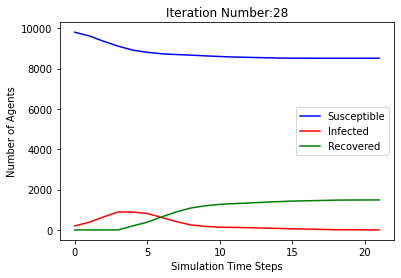

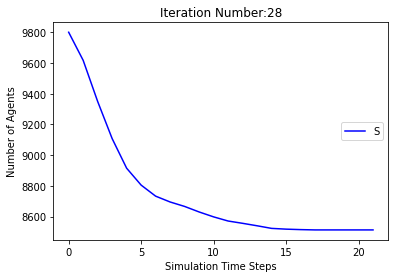

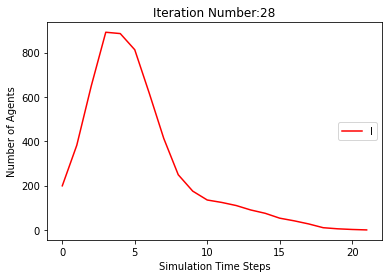

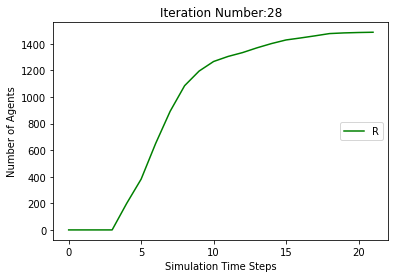

[9801, 9588, 9320, 9062, 8880, 8763, 8682, 8617, 8562, 8526, 8475, 8442, 8405, 8370, 8351, 8332, 8322, 8312, 8300, 8297, 8293, 8290, 8287, 8286, 8285, 8283, 8283, 8283, 8283, 8283]
[199, 412, 680, 938, 921, 825, 638, 445, 318, 237, 207, 175, 157, 156, 124, 110, 83, 58, 51, 35, 29, 22, 13, 11, 8, 7, 4, 3, 2, 0]
[0, 0, 0, 0, 199, 412, 680, 938, 1120, 1237, 1318, 1383, 1438, 1474, 1525, 1558, 1595, 1630, 1649, 1668, 1678, 1688, 1700, 1703, 1707, 1710, 1713, 1714, 1715, 1717]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8

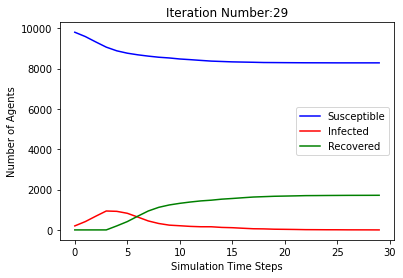

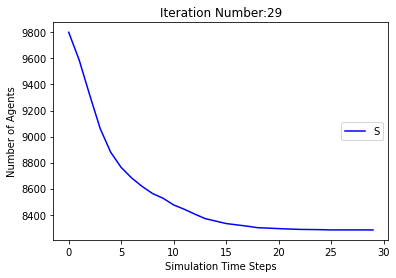

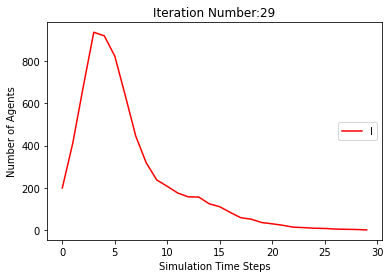

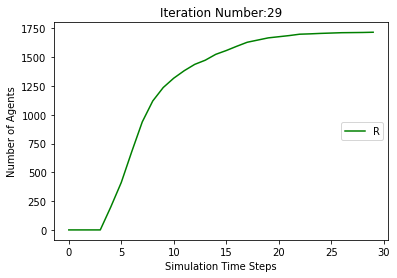

[9801, 9596, 9318, 9070, 8890, 8805, 8728, 8682, 8627, 8588, 8572, 8562, 8553, 8546, 8544, 8542, 8539, 8539, 8539, 8539, 8539]
[199, 404, 682, 930, 911, 791, 590, 388, 263, 217, 156, 120, 74, 42, 28, 20, 14, 7, 5, 3, 0]
[0, 0, 0, 0, 199, 404, 682, 930, 1110, 1195, 1272, 1318, 1373, 1412, 1428, 1438, 1447, 1454, 1456, 1458, 1461]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8

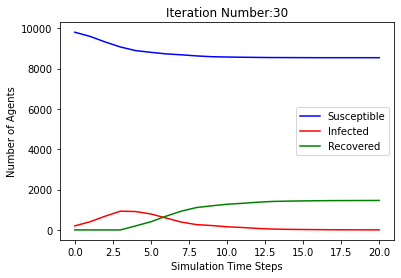

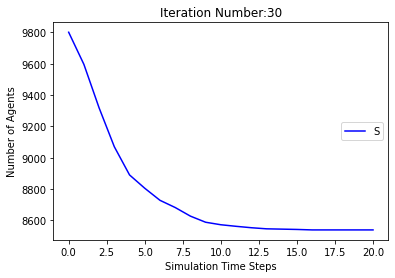

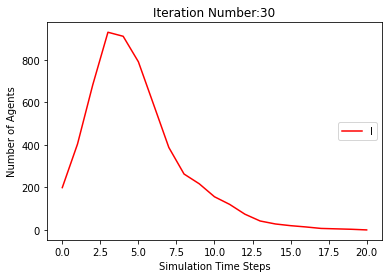

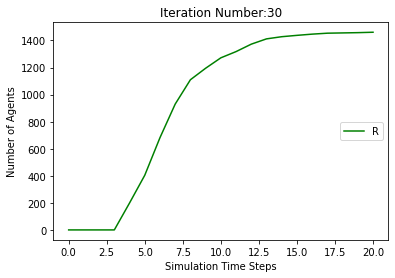

[9801, 9618, 9352, 9119, 8944, 8844, 8764, 8710, 8668, 8632, 8598, 8569, 8542, 8514, 8497, 8488, 8486, 8485, 8485, 8485, 8485, 8485]
[199, 382, 648, 881, 857, 774, 588, 409, 276, 212, 166, 141, 126, 118, 101, 81, 56, 29, 12, 3, 1, 0]
[0, 0, 0, 0, 199, 382, 648, 881, 1056, 1156, 1236, 1290, 1332, 1368, 1402, 1431, 1458, 1486, 1503, 1512, 1514, 1515]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247,

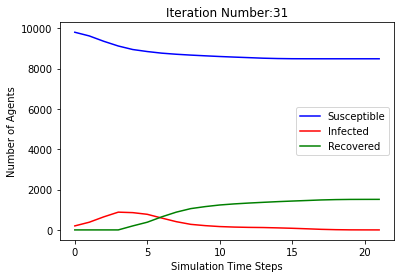

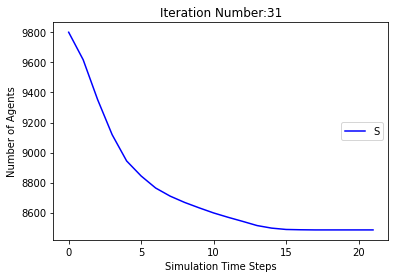

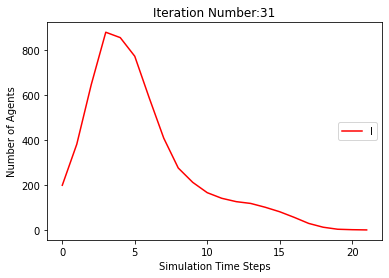

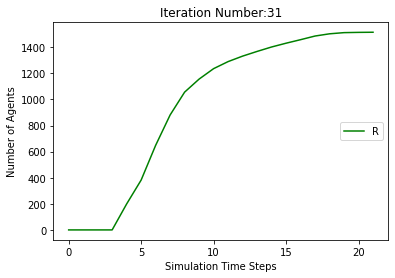

[9801, 9618, 9364, 9127, 8939, 8858, 8800, 8741, 8702, 8662, 8635, 8619, 8610, 8605, 8603, 8602, 8602, 8602, 8602, 8602]
[199, 382, 636, 873, 862, 760, 564, 386, 237, 196, 165, 122, 92, 57, 32, 17, 8, 3, 1, 0]
[0, 0, 0, 0, 199, 382, 636, 873, 1061, 1142, 1200, 1259, 1298, 1338, 1365, 1381, 1390, 1395, 1397, 1398]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126,

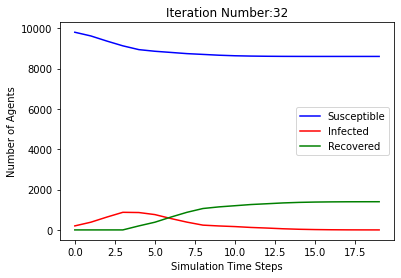

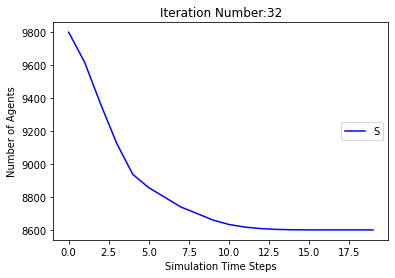

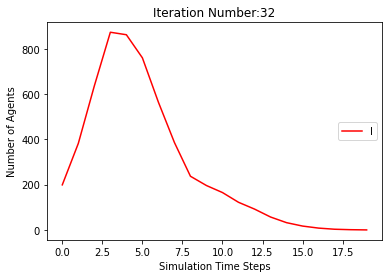

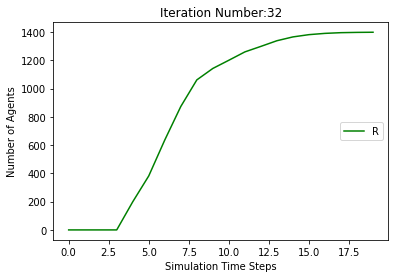

[9801, 9597, 9336, 9100, 8921, 8824, 8748, 8704, 8676, 8648, 8637, 8627, 8618, 8603, 8591, 8585, 8576, 8571, 8568, 8566, 8566, 8566, 8566, 8566]
[199, 403, 664, 900, 880, 773, 588, 396, 245, 176, 111, 77, 58, 45, 46, 42, 42, 32, 23, 19, 10, 5, 2, 0]
[0, 0, 0, 0, 199, 403, 664, 900, 1079, 1176, 1252, 1296, 1324, 1352, 1363, 1373, 1382, 1397, 1409, 1415, 1424, 1429, 1432, 1434]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8

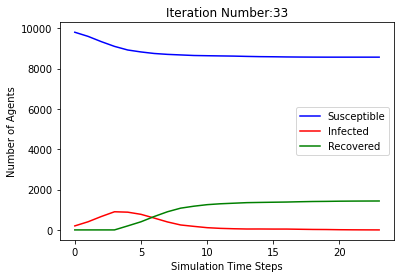

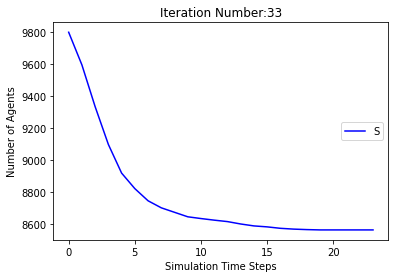

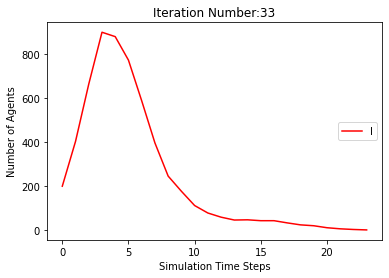

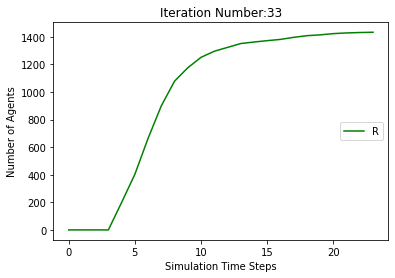

[9801, 9621, 9356, 9110, 8930, 8836, 8782, 8740, 8706, 8678, 8660, 8642, 8629, 8616, 8610, 8610, 8610, 8610, 8610]
[199, 379, 644, 890, 871, 785, 574, 370, 224, 158, 122, 98, 77, 62, 50, 32, 19, 6, 0]
[0, 0, 0, 0, 199, 379, 644, 890, 1070, 1164, 1218, 1260, 1294, 1322, 1340, 1358, 1371, 1384, 1390]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 80

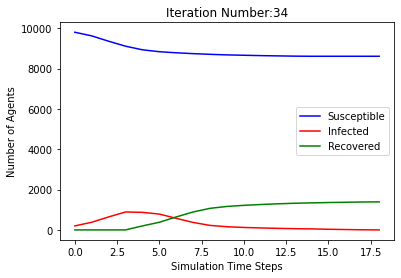

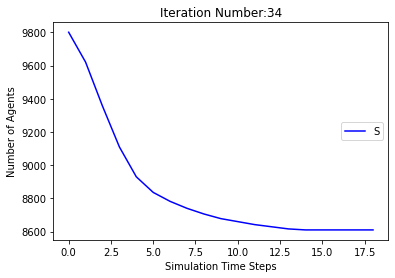

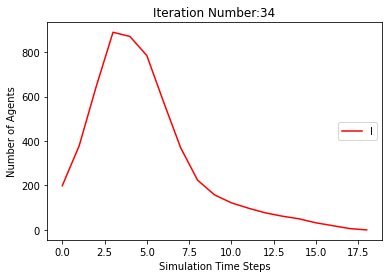

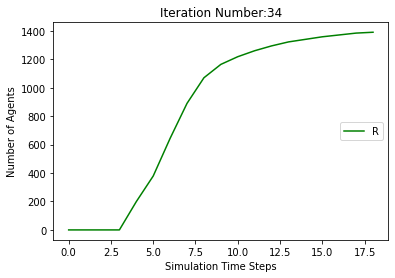

[9801, 9606, 9349, 9117, 8928, 8827, 8741, 8669, 8603, 8547, 8497, 8458, 8415, 8385, 8360, 8343, 8329, 8317, 8308, 8305, 8305, 8305, 8305, 8305]
[199, 394, 651, 883, 873, 779, 608, 448, 325, 280, 244, 211, 188, 162, 137, 115, 86, 68, 52, 38, 24, 12, 3, 0]
[0, 0, 0, 0, 199, 394, 651, 883, 1072, 1173, 1259, 1331, 1397, 1453, 1503, 1542, 1585, 1615, 1640, 1657, 1671, 1683, 1692, 1695]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8

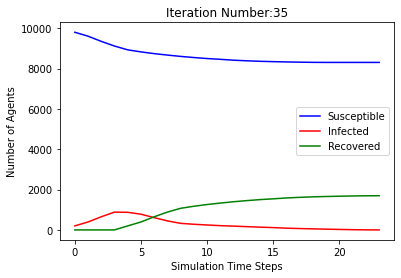

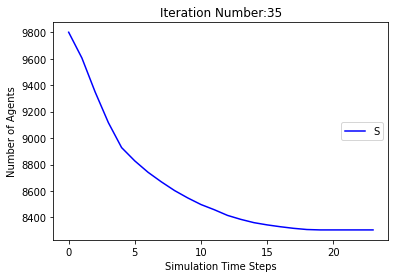

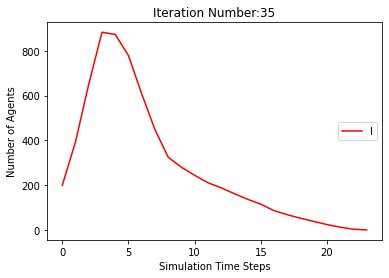

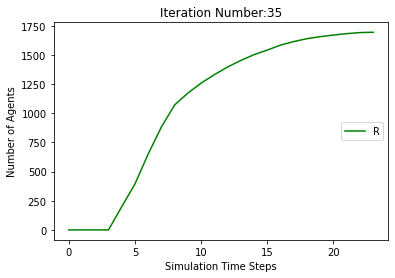

[9801, 9602, 9342, 9104, 8921, 8844, 8762, 8695, 8638, 8596, 8554, 8524, 8502, 8484, 8465, 8456, 8452, 8451, 8449, 8449, 8449, 8449, 8449]
[199, 398, 658, 896, 880, 758, 580, 409, 283, 248, 208, 171, 136, 112, 89, 68, 50, 33, 16, 7, 3, 2, 0]
[0, 0, 0, 0, 199, 398, 658, 896, 1079, 1156, 1238, 1305, 1362, 1404, 1446, 1476, 1498, 1516, 1535, 1544, 1548, 1549, 1551]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 832

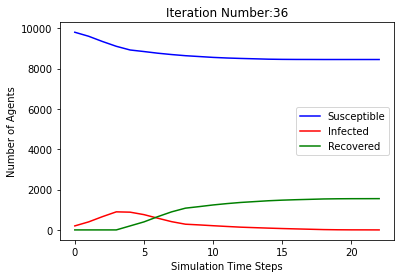

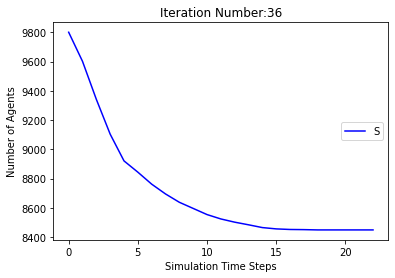

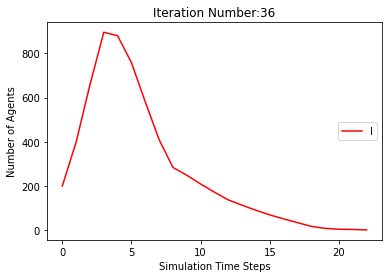

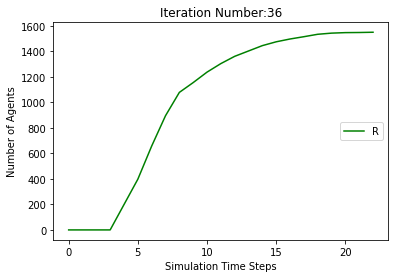

[9801, 9599, 9382, 9152, 8927, 8780, 8682, 8609, 8541, 8478, 8439, 8415, 8396, 8381, 8355, 8342, 8334, 8328, 8322, 8320, 8320, 8319, 8319, 8319, 8319, 8319]
[199, 401, 618, 848, 874, 819, 700, 543, 386, 302, 243, 194, 145, 97, 84, 73, 62, 53, 33, 22, 14, 9, 3, 1, 1, 0]
[0, 0, 0, 0, 199, 401, 618, 848, 1073, 1220, 1318, 1391, 1459, 1522, 1561, 1585, 1604, 1619, 1645, 1658, 1666, 1672, 1678, 1680, 1680, 1681]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356,

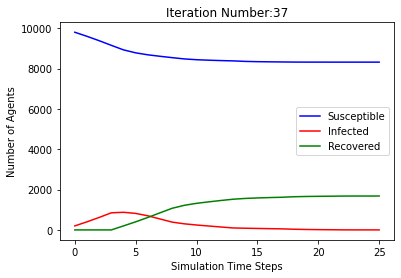

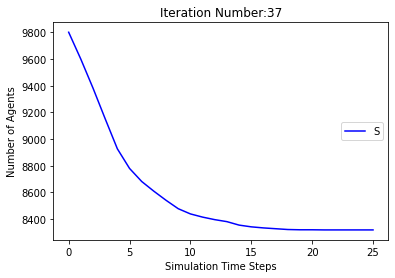

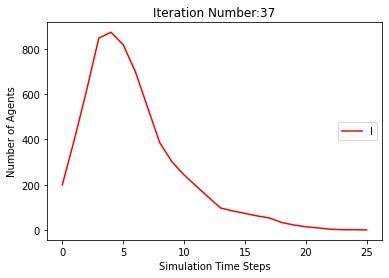

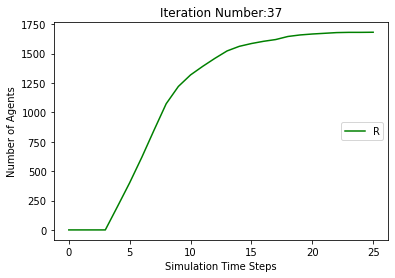

[9801, 9615, 9365, 9115, 8914, 8824, 8741, 8684, 8633, 8589, 8553, 8521, 8504, 8492, 8489, 8484, 8483, 8483, 8483, 8483, 8483]
[199, 385, 635, 885, 887, 791, 624, 431, 281, 235, 188, 163, 129, 97, 64, 37, 21, 9, 6, 1, 0]
[0, 0, 0, 0, 199, 385, 635, 885, 1086, 1176, 1259, 1316, 1367, 1411, 1447, 1479, 1496, 1508, 1511, 1516, 1517]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 

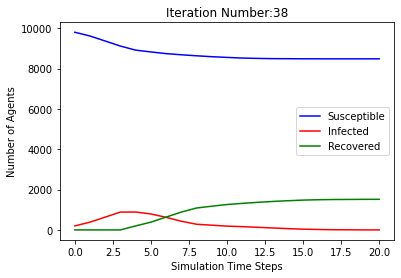

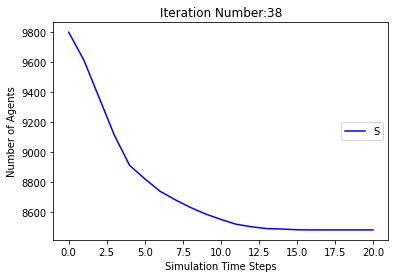

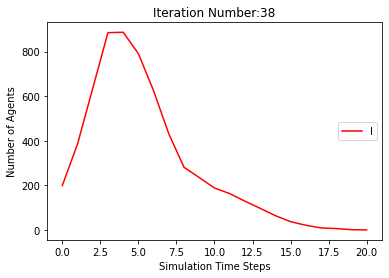

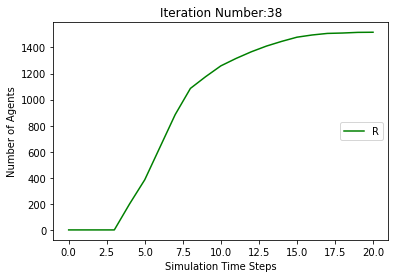

[9801, 9585, 9329, 9090, 8914, 8814, 8743, 8701, 8672, 8648, 8636, 8623, 8615, 8610, 8607, 8605, 8603, 8602, 8602, 8600, 8600, 8600, 8600, 8600]
[199, 415, 671, 910, 887, 771, 586, 389, 242, 166, 107, 78, 57, 38, 29, 18, 12, 8, 5, 5, 3, 2, 2, 0]
[0, 0, 0, 0, 199, 415, 671, 910, 1086, 1186, 1257, 1299, 1328, 1352, 1364, 1377, 1385, 1390, 1393, 1395, 1397, 1398, 1398, 1400]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457,

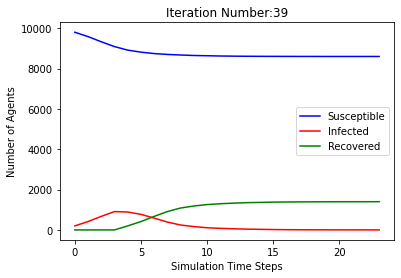

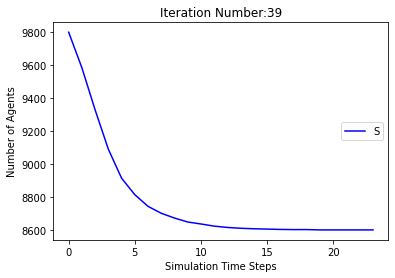

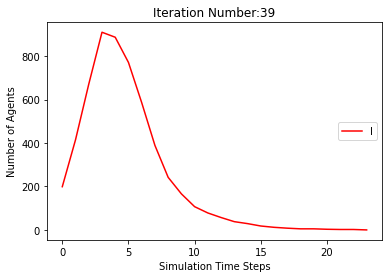

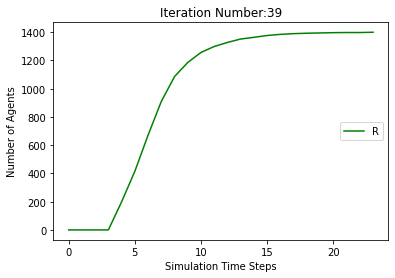

[9801, 9613, 9361, 9102, 8936, 8827, 8757, 8695, 8648, 8605, 8570, 8540, 8515, 8505, 8491, 8478, 8464, 8445, 8439, 8434, 8432, 8431, 8431, 8431, 8431, 8431]
[199, 387, 639, 898, 865, 786, 604, 407, 288, 222, 187, 155, 133, 100, 79, 62, 51, 60, 52, 44, 32, 14, 8, 3, 1, 0]
[0, 0, 0, 0, 199, 387, 639, 898, 1064, 1173, 1243, 1305, 1352, 1395, 1430, 1460, 1485, 1495, 1509, 1522, 1536, 1555, 1561, 1566, 1568, 1569]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 935

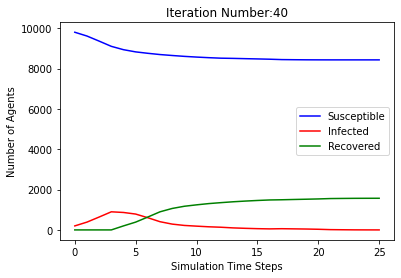

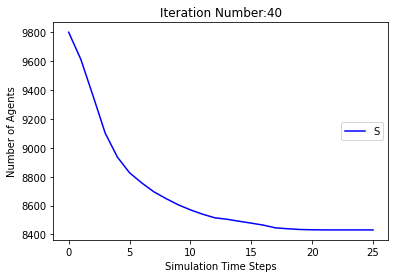

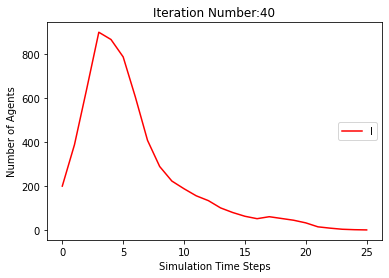

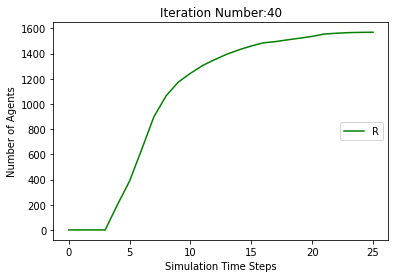

[9801, 9605, 9361, 9113, 8913, 8833, 8754, 8674, 8602, 8556, 8522, 8493, 8476, 8467, 8462, 8452, 8449, 8446, 8444, 8442, 8439, 8439, 8438, 8438, 8438, 8438, 8438]
[199, 395, 639, 887, 888, 772, 607, 439, 311, 277, 232, 181, 126, 89, 60, 41, 27, 21, 18, 10, 10, 7, 6, 4, 1, 1, 0]
[0, 0, 0, 0, 199, 395, 639, 887, 1087, 1167, 1246, 1326, 1398, 1444, 1478, 1507, 1524, 1533, 1538, 1548, 1551, 1554, 1556, 1558, 1561, 1561, 1562]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [98

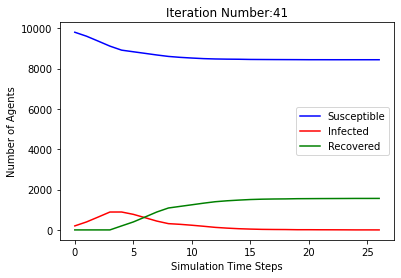

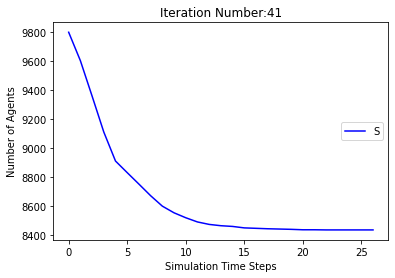

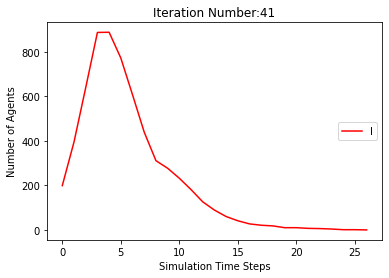

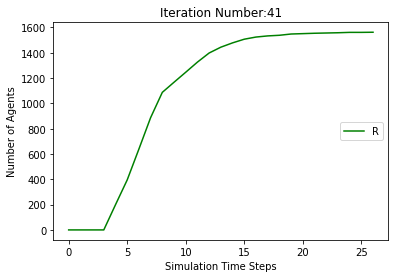

[9801, 9612, 9359, 9097, 8860, 8738, 8648, 8583, 8545, 8506, 8478, 8466, 8451, 8443, 8437, 8435, 8432, 8432, 8432, 8432, 8432]
[199, 388, 641, 903, 941, 874, 711, 514, 315, 232, 170, 117, 94, 63, 41, 31, 19, 11, 5, 3, 0]
[0, 0, 0, 0, 199, 388, 641, 903, 1140, 1262, 1352, 1417, 1455, 1494, 1522, 1534, 1549, 1557, 1563, 1565, 1568]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 

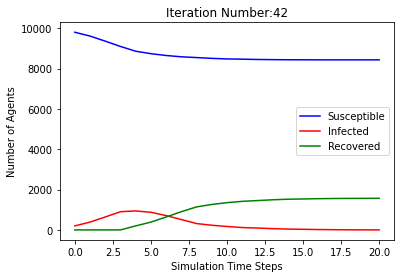

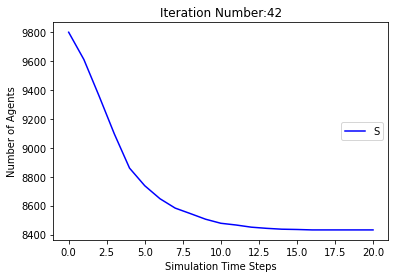

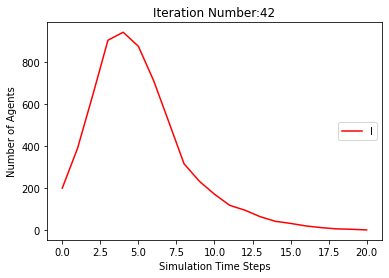

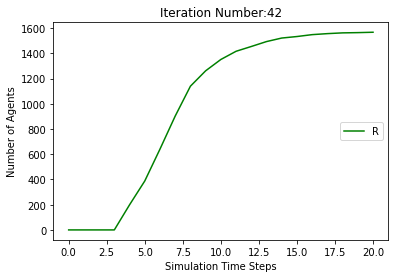

[9801, 9615, 9354, 9111, 8931, 8850, 8795, 8746, 8702, 8679, 8656, 8631, 8614, 8608, 8606, 8603, 8601, 8600, 8599, 8599, 8599, 8599, 8599]
[199, 385, 646, 889, 870, 765, 559, 365, 229, 171, 139, 115, 88, 71, 50, 28, 13, 8, 7, 4, 2, 1, 0]
[0, 0, 0, 0, 199, 385, 646, 889, 1069, 1150, 1205, 1254, 1298, 1321, 1344, 1369, 1386, 1392, 1394, 1397, 1399, 1400, 1401]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8

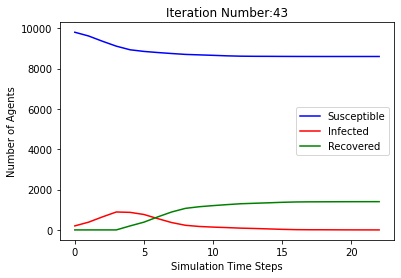

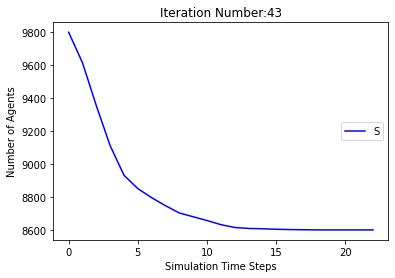

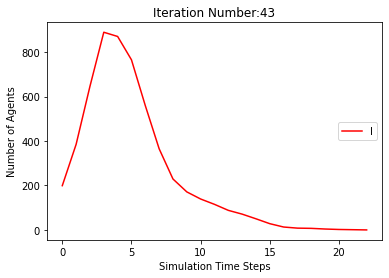

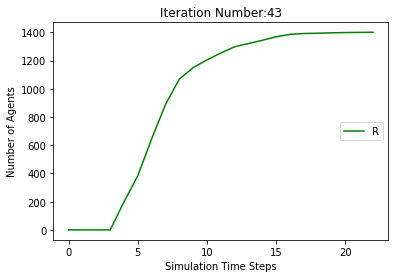

[9801, 9600, 9345, 9099, 8938, 8841, 8774, 8719, 8680, 8654, 8638, 8629, 8627, 8625, 8625, 8625, 8625, 8625]
[199, 400, 655, 901, 863, 759, 571, 380, 258, 187, 136, 90, 53, 29, 13, 4, 2, 0]
[0, 0, 0, 0, 199, 400, 655, 901, 1062, 1159, 1226, 1281, 1320, 1346, 1362, 1371, 1373, 1375]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8098, 8095, 8092, 8

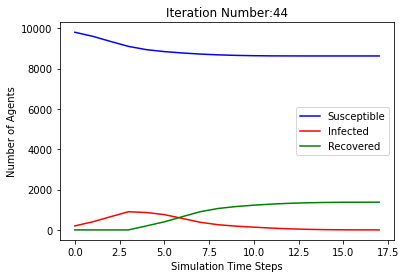

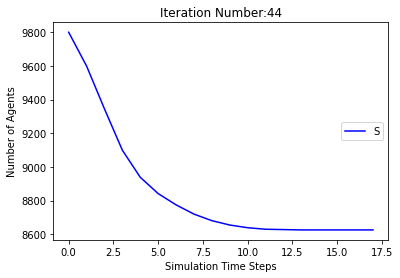

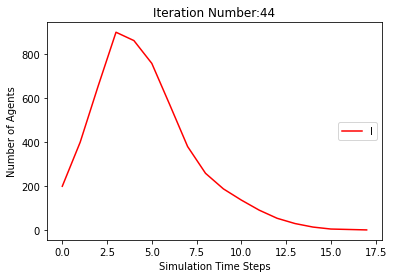

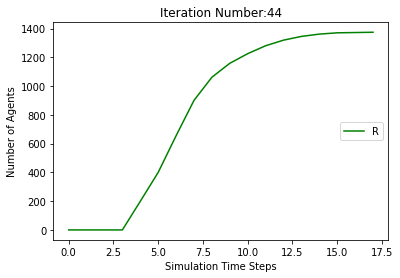

[9801, 9612, 9354, 9125, 8949, 8855, 8772, 8705, 8641, 8568, 8505, 8465, 8429, 8405, 8395, 8390, 8385, 8385, 8384, 8382, 8382, 8382, 8382, 8382]
[199, 388, 646, 875, 852, 757, 582, 420, 308, 287, 267, 240, 212, 163, 110, 75, 44, 20, 11, 8, 3, 3, 2, 0]
[0, 0, 0, 0, 199, 388, 646, 875, 1051, 1145, 1228, 1295, 1359, 1432, 1495, 1535, 1571, 1595, 1605, 1610, 1615, 1615, 1616, 1618]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545,

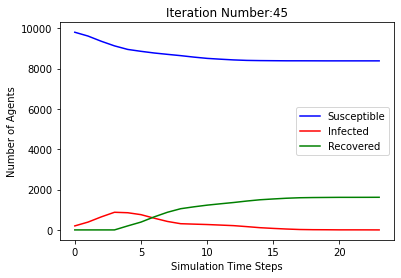

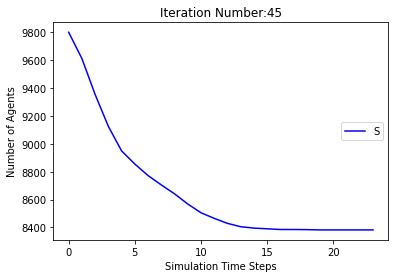

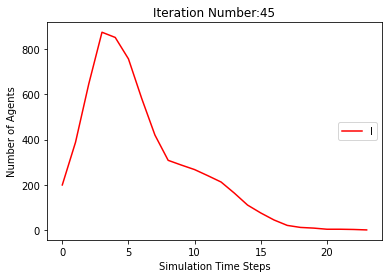

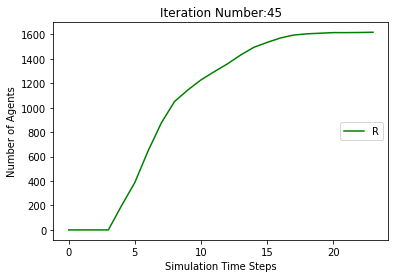

[9801, 9618, 9358, 9118, 8940, 8851, 8782, 8734, 8696, 8664, 8651, 8645, 8638, 8632, 8632, 8631, 8630, 8630, 8630, 8630, 8630]
[199, 382, 642, 882, 861, 767, 576, 384, 244, 187, 131, 89, 58, 32, 19, 14, 8, 2, 2, 1, 0]
[0, 0, 0, 0, 199, 382, 642, 882, 1060, 1149, 1218, 1266, 1304, 1336, 1349, 1355, 1362, 1368, 1368, 1369, 1370]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 815

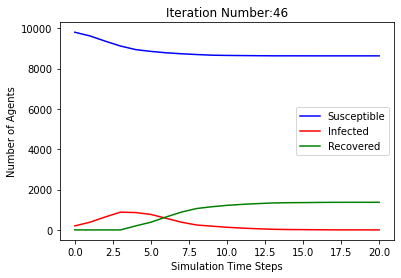

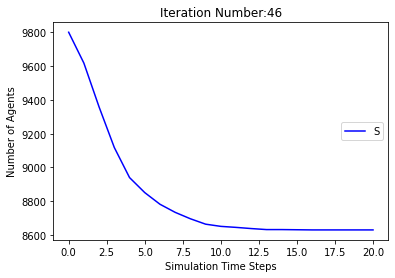

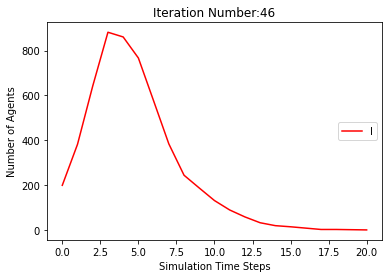

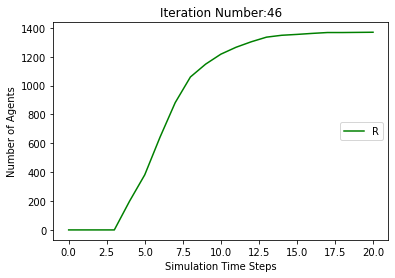

[9801, 9611, 9367, 9118, 8921, 8826, 8750, 8706, 8674, 8649, 8625, 8606, 8590, 8585, 8581, 8579, 8578, 8578, 8578, 8578, 8578]
[199, 389, 633, 882, 880, 785, 617, 412, 247, 177, 125, 100, 84, 64, 44, 27, 12, 7, 3, 1, 0]
[0, 0, 0, 0, 199, 389, 633, 882, 1079, 1174, 1250, 1294, 1326, 1351, 1375, 1394, 1410, 1415, 1419, 1421, 1422]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8

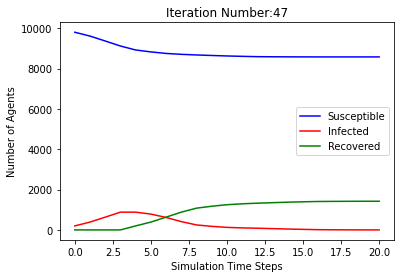

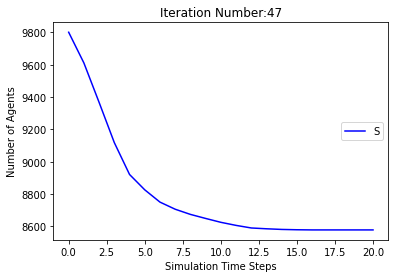

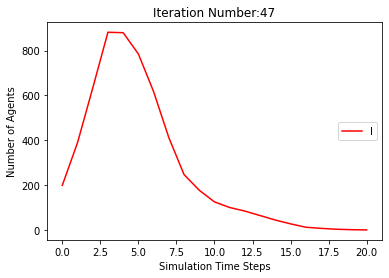

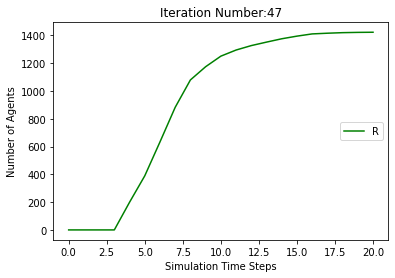

[9801, 9612, 9352, 9080, 8902, 8798, 8739, 8690, 8653, 8631, 8609, 8600, 8590, 8586, 8582, 8582, 8582, 8582, 8582]
[199, 388, 648, 920, 899, 814, 613, 390, 249, 167, 130, 90, 63, 45, 27, 18, 8, 4, 0]
[0, 0, 0, 0, 199, 388, 648, 920, 1098, 1202, 1261, 1310, 1347, 1369, 1391, 1400, 1410, 1414, 1418]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 809

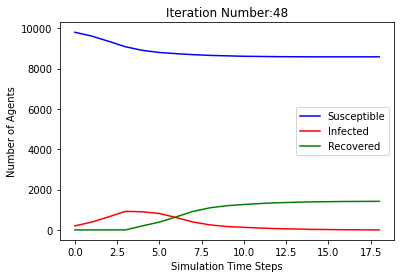

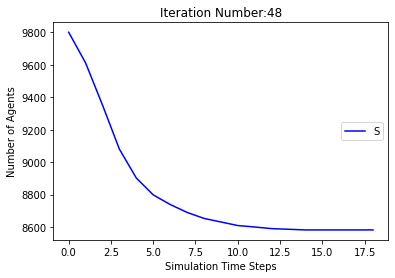

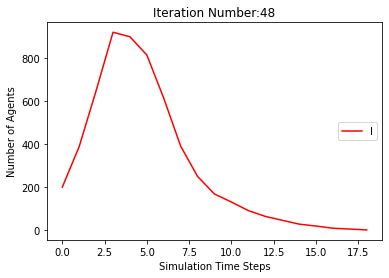

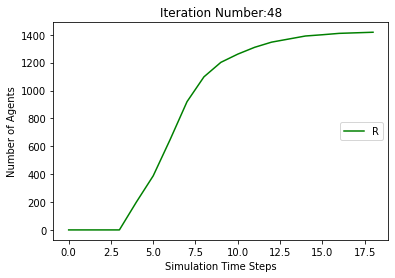

[9801, 9617, 9338, 9112, 8942, 8856, 8792, 8750, 8710, 8679, 8653, 8629, 8616, 8604, 8596, 8593, 8593, 8593, 8593, 8592, 8592, 8592, 8592, 8592]
[199, 383, 662, 888, 859, 761, 546, 362, 232, 177, 139, 121, 94, 75, 57, 36, 23, 11, 3, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 383, 662, 888, 1058, 1144, 1208, 1250, 1290, 1321, 1347, 1371, 1384, 1396, 1404, 1407, 1407, 1407, 1407, 1408]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 845

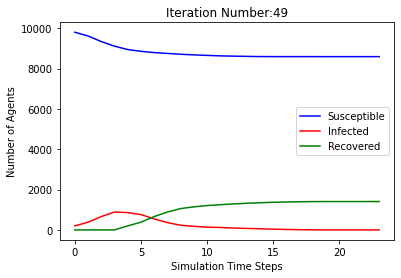

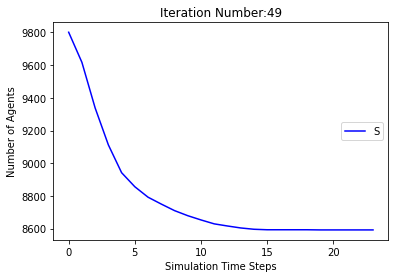

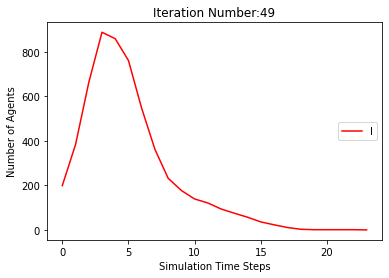

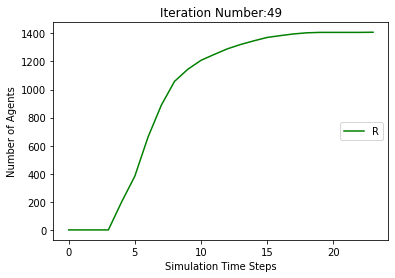

[9801, 9591, 9349, 9108, 8934, 8838, 8778, 8733, 8692, 8673, 8651, 8638, 8629, 8623, 8615, 8610, 8609, 8609, 8609, 8608, 8608, 8608, 8608, 8608]
[199, 409, 651, 892, 867, 753, 571, 375, 242, 165, 127, 95, 63, 50, 36, 28, 20, 14, 6, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 409, 651, 892, 1066, 1162, 1222, 1267, 1308, 1327, 1349, 1362, 1371, 1377, 1385, 1390, 1391, 1391, 1391, 1392]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457

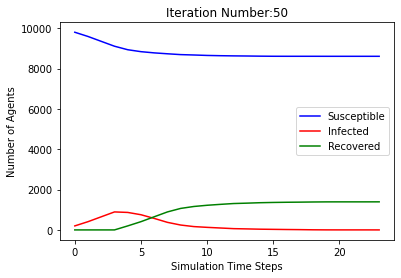

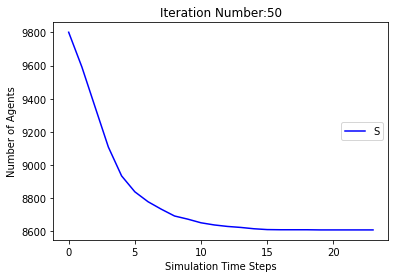

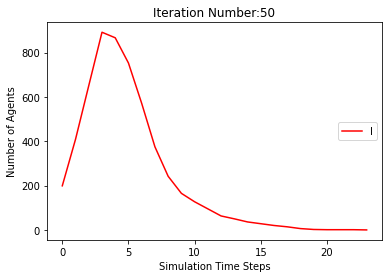

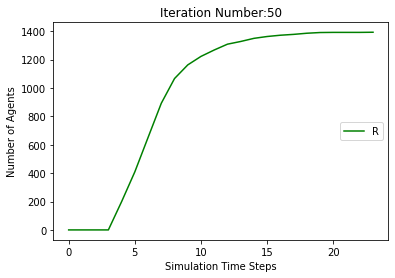

[9801, 9595, 9349, 9105, 8935, 8845, 8766, 8699, 8654, 8604, 8553, 8518, 8489, 8465, 8451, 8434, 8423, 8416, 8413, 8409, 8407, 8407, 8406, 8406, 8406, 8406, 8406]
[199, 405, 651, 895, 866, 750, 583, 406, 281, 241, 213, 181, 165, 139, 102, 84, 66, 49, 38, 25, 16, 9, 7, 3, 1, 1, 0]
[0, 0, 0, 0, 199, 405, 651, 895, 1065, 1155, 1234, 1301, 1346, 1396, 1447, 1482, 1511, 1535, 1549, 1566, 1577, 1584, 1587, 1591, 1593, 1593, 1594]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [

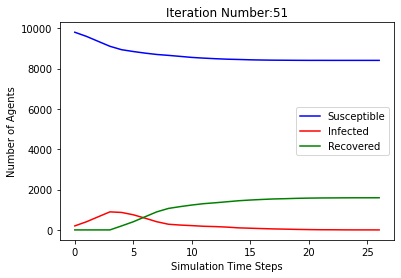

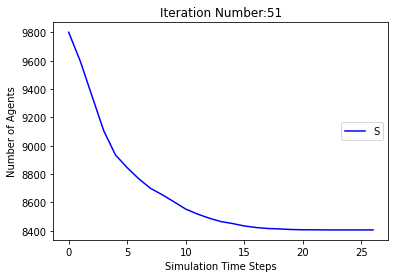

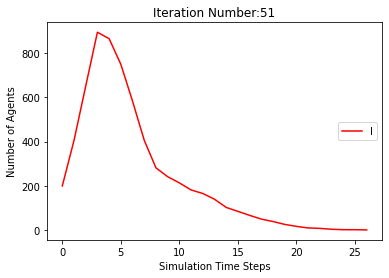

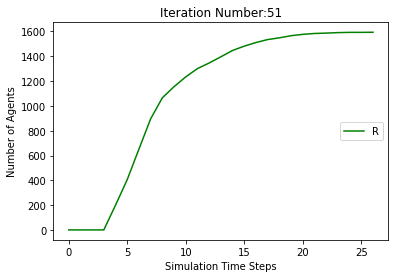

[9801, 9594, 9342, 9082, 8895, 8776, 8699, 8627, 8573, 8529, 8493, 8466, 8453, 8439, 8433, 8428, 8424, 8423, 8423, 8423, 8423, 8423]
[199, 406, 658, 918, 906, 818, 643, 455, 322, 247, 206, 161, 120, 90, 60, 38, 29, 16, 10, 5, 1, 0]
[0, 0, 0, 0, 199, 406, 658, 918, 1105, 1224, 1301, 1373, 1427, 1471, 1507, 1534, 1547, 1561, 1567, 1572, 1576, 1577]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8

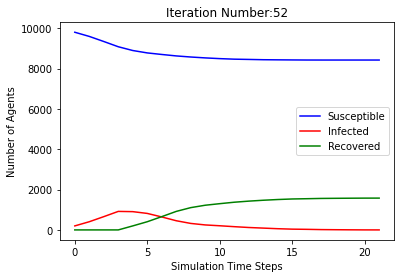

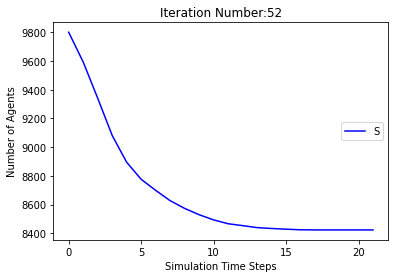

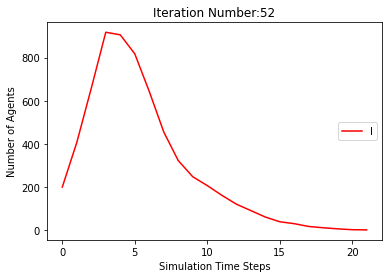

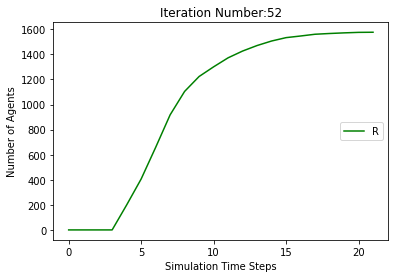

[9801, 9585, 9303, 9060, 8895, 8792, 8711, 8637, 8586, 8533, 8463, 8405, 8348, 8299, 8249, 8216, 8182, 8156, 8134, 8116, 8107, 8099, 8095, 8094, 8092, 8092, 8092, 8092, 8092]
[199, 415, 697, 940, 906, 793, 592, 423, 309, 259, 248, 232, 238, 234, 214, 189, 166, 143, 115, 100, 75, 57, 39, 22, 15, 7, 3, 2, 0]
[0, 0, 0, 0, 199, 415, 697, 940, 1105, 1208, 1289, 1363, 1414, 1467, 1537, 1595, 1652, 1701, 1751, 1784, 1818, 1844, 1866, 1884, 1893, 1901, 1905, 1906, 1908]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444,

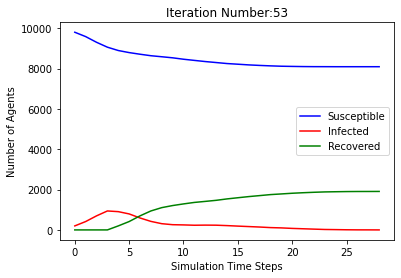

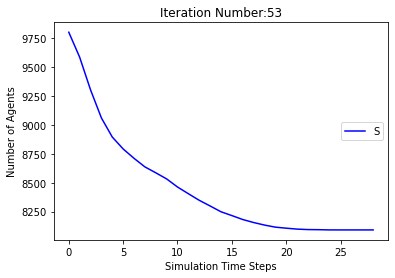

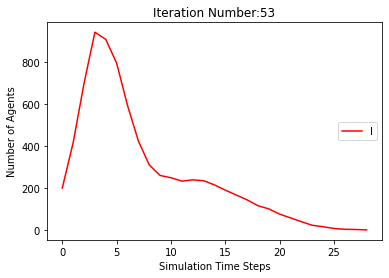

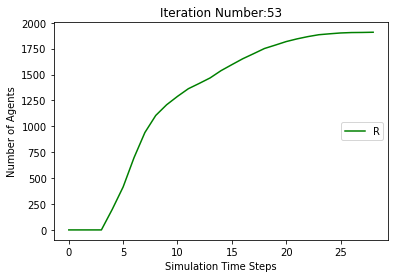

[9801, 9595, 9355, 9094, 8886, 8782, 8694, 8615, 8542, 8480, 8430, 8391, 8372, 8359, 8345, 8344, 8344, 8344, 8344, 8344]
[199, 405, 645, 906, 915, 813, 661, 479, 344, 302, 264, 224, 170, 121, 85, 47, 28, 15, 1, 0]
[0, 0, 0, 0, 199, 405, 645, 906, 1114, 1218, 1306, 1385, 1458, 1520, 1570, 1609, 1628, 1641, 1655, 1656]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8

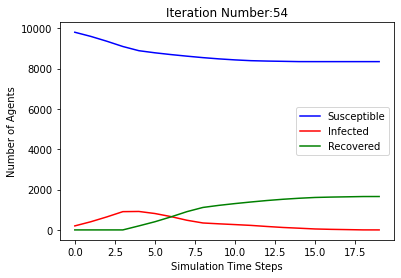

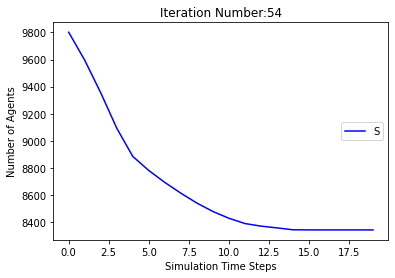

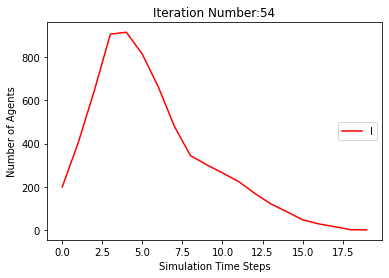

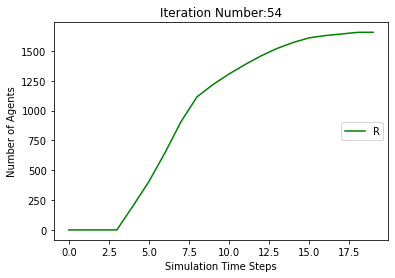

[9801, 9584, 9328, 9101, 8928, 8820, 8743, 8682, 8625, 8576, 8543, 8528, 8518, 8504, 8495, 8486, 8480, 8480, 8479, 8478, 8478, 8478, 8478, 8478]
[199, 416, 672, 899, 873, 764, 585, 419, 303, 244, 200, 154, 107, 72, 48, 42, 38, 24, 16, 8, 2, 2, 1, 0]
[0, 0, 0, 0, 199, 416, 672, 899, 1072, 1180, 1257, 1318, 1375, 1424, 1457, 1472, 1482, 1496, 1505, 1514, 1520, 1520, 1521, 1522]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8

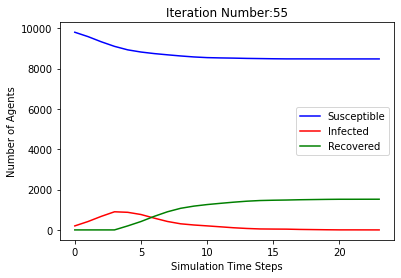

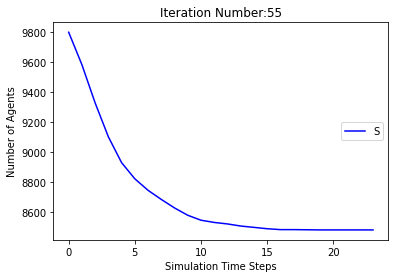

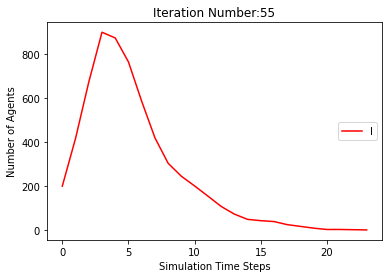

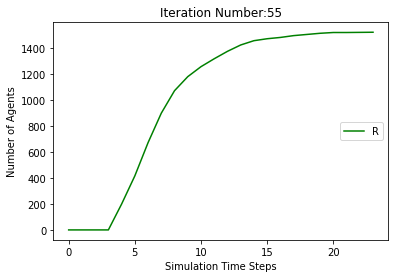

[9801, 9610, 9352, 9095, 8928, 8844, 8796, 8772, 8745, 8722, 8708, 8697, 8687, 8684, 8676, 8673, 8669, 8666, 8666, 8666, 8666, 8666]
[199, 390, 648, 905, 873, 766, 556, 323, 183, 122, 88, 75, 58, 38, 32, 24, 18, 18, 10, 7, 3, 0]
[0, 0, 0, 0, 199, 390, 648, 905, 1072, 1156, 1204, 1228, 1255, 1278, 1292, 1303, 1313, 1316, 1324, 1327, 1331, 1334]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213

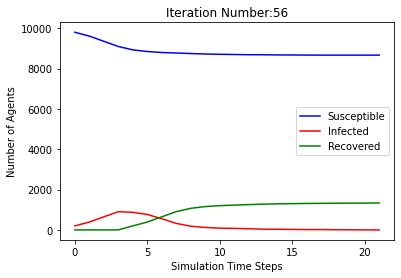

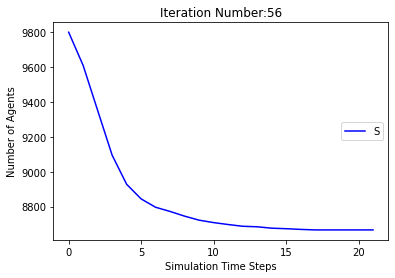

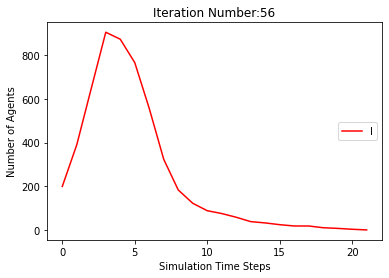

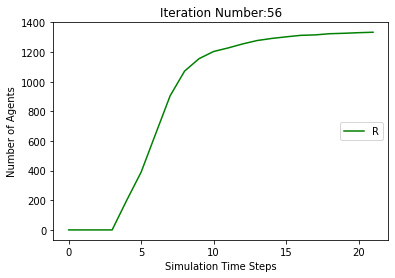

[9801, 9617, 9359, 9110, 8925, 8848, 8790, 8747, 8720, 8700, 8687, 8676, 8669, 8668, 8667, 8666, 8666, 8666, 8666, 8666]
[199, 383, 641, 890, 876, 769, 569, 363, 205, 148, 103, 71, 51, 32, 20, 10, 3, 2, 1, 0]
[0, 0, 0, 0, 199, 383, 641, 890, 1075, 1152, 1210, 1253, 1280, 1300, 1313, 1324, 1331, 1332, 1333, 1334]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 

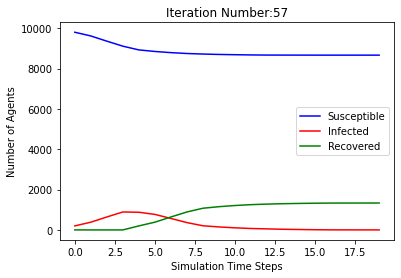

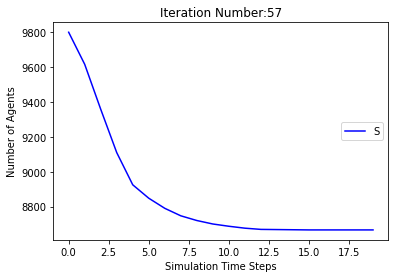

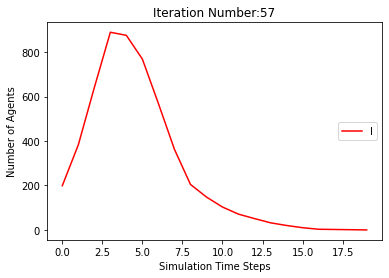

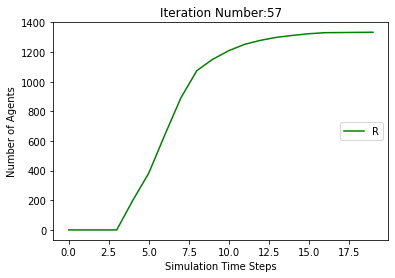

[9801, 9603, 9352, 9093, 8923, 8818, 8737, 8667, 8601, 8551, 8514, 8480, 8442, 8418, 8404, 8392, 8380, 8374, 8370, 8370, 8370, 8370, 8370]
[199, 397, 648, 907, 878, 785, 615, 426, 322, 267, 223, 187, 159, 133, 110, 88, 62, 44, 34, 22, 10, 4, 0]
[0, 0, 0, 0, 199, 397, 648, 907, 1077, 1182, 1263, 1333, 1399, 1449, 1486, 1520, 1558, 1582, 1596, 1608, 1620, 1626, 1630]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 

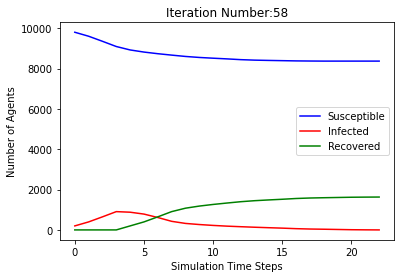

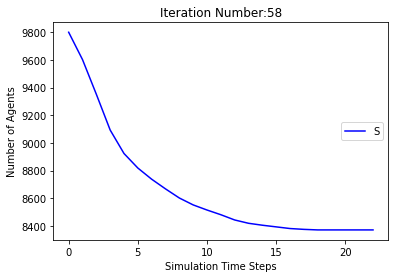

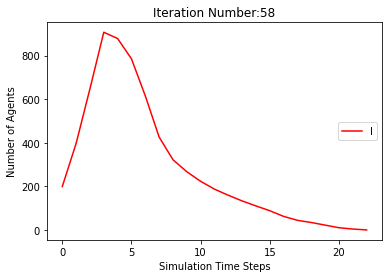

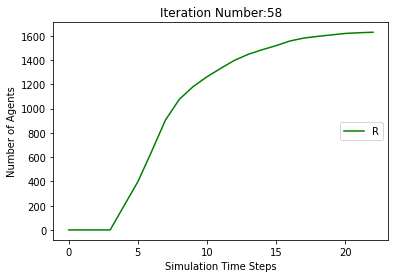

[9801, 9628, 9372, 9127, 8949, 8844, 8771, 8718, 8678, 8655, 8640, 8627, 8614, 8611, 8611, 8611, 8611, 8611]
[199, 372, 628, 873, 852, 784, 601, 409, 271, 189, 131, 91, 64, 44, 29, 16, 3, 0]
[0, 0, 0, 0, 199, 372, 628, 873, 1051, 1156, 1229, 1282, 1322, 1345, 1360, 1373, 1386, 1389]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8098, 8095, 8092, 

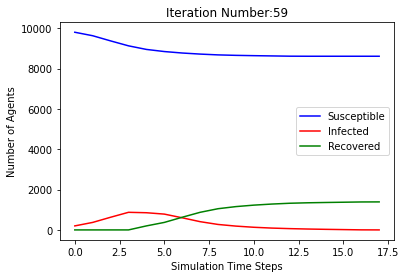

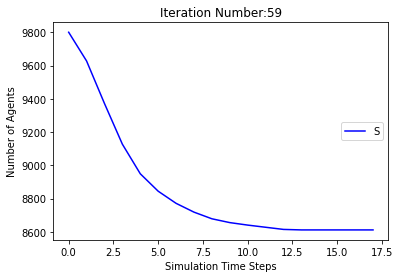

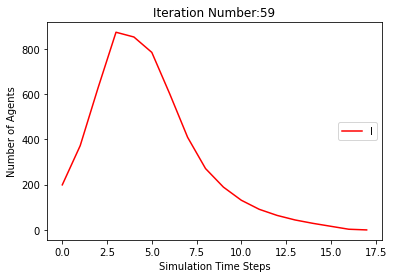

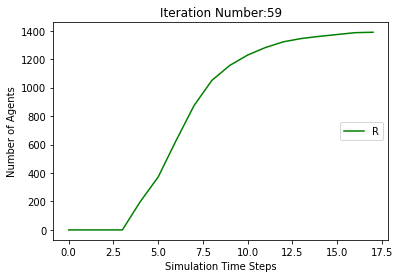

[9801, 9595, 9334, 9088, 8904, 8811, 8723, 8668, 8603, 8549, 8499, 8457, 8424, 8389, 8368, 8362, 8358, 8355, 8351, 8351, 8351, 8351, 8351]
[199, 405, 666, 912, 897, 784, 611, 420, 301, 262, 224, 211, 179, 160, 131, 95, 66, 34, 17, 11, 7, 4, 0]
[0, 0, 0, 0, 199, 405, 666, 912, 1096, 1189, 1277, 1332, 1397, 1451, 1501, 1543, 1576, 1611, 1632, 1638, 1642, 1645, 1649]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8

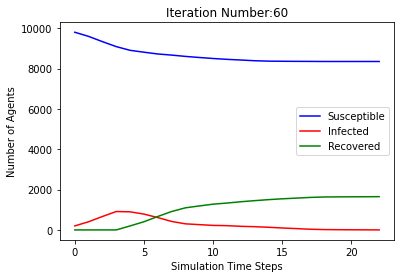

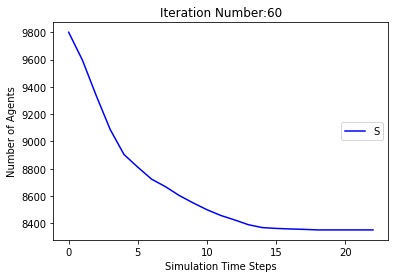

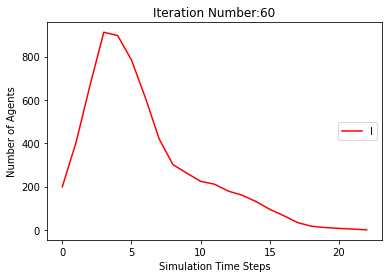

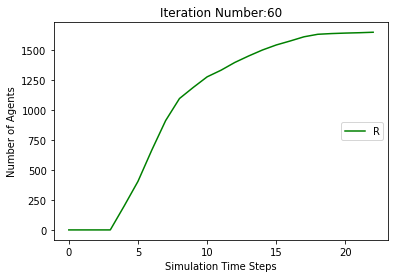

[9801, 9586, 9299, 9047, 8889, 8819, 8754, 8716, 8677, 8656, 8637, 8628, 8615, 8611, 8609, 8609, 8609, 8609, 8609]
[199, 414, 701, 953, 912, 767, 545, 331, 212, 163, 117, 88, 62, 45, 28, 19, 6, 2, 0]
[0, 0, 0, 0, 199, 414, 701, 953, 1111, 1181, 1246, 1284, 1323, 1344, 1363, 1372, 1385, 1389, 1391]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 809

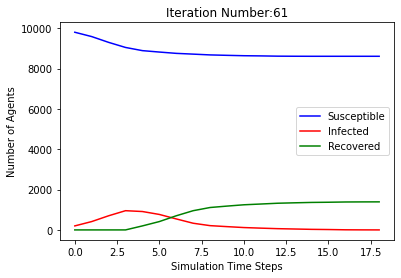

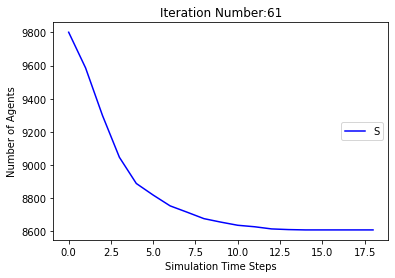

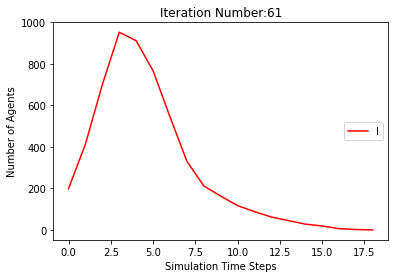

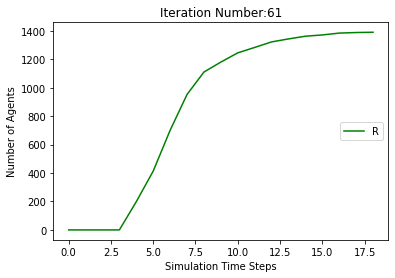

[9801, 9599, 9312, 9073, 8907, 8821, 8758, 8710, 8677, 8653, 8633, 8616, 8611, 8604, 8603, 8602, 8602, 8602, 8602, 8602]
[199, 401, 688, 927, 894, 778, 554, 363, 230, 168, 125, 94, 66, 49, 30, 14, 9, 2, 1, 0]
[0, 0, 0, 0, 199, 401, 688, 927, 1093, 1179, 1242, 1290, 1323, 1347, 1367, 1384, 1389, 1396, 1397, 1398]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 

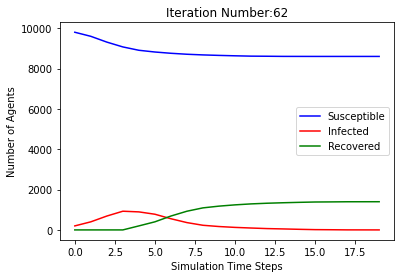

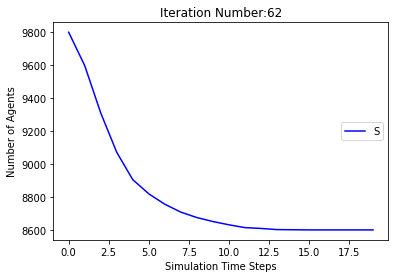

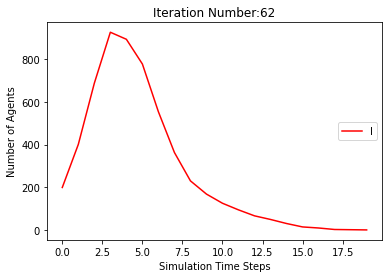

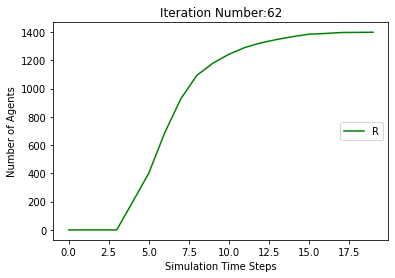

[9801, 9618, 9358, 9095, 8908, 8801, 8735, 8671, 8616, 8578, 8552, 8541, 8535, 8529, 8527, 8526, 8526, 8526, 8526, 8526]
[199, 382, 642, 905, 893, 817, 623, 424, 292, 223, 183, 130, 81, 49, 25, 15, 9, 3, 1, 0]
[0, 0, 0, 0, 199, 382, 642, 905, 1092, 1199, 1265, 1329, 1384, 1422, 1448, 1459, 1465, 1471, 1473, 1474]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126,

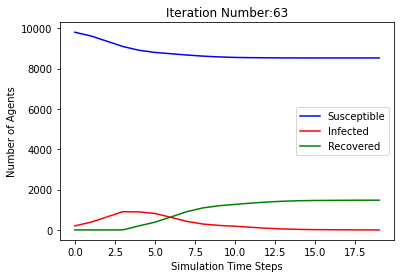

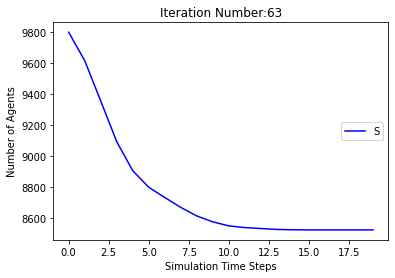

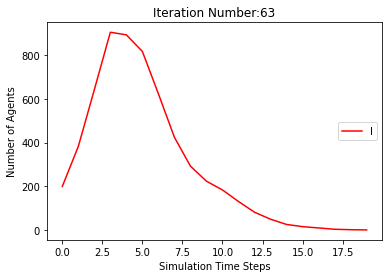

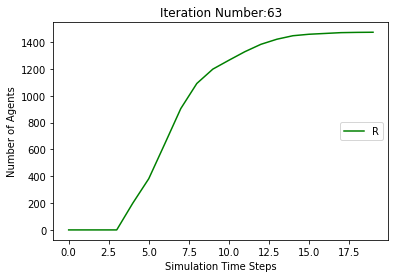

[9801, 9616, 9345, 9104, 8933, 8825, 8758, 8710, 8667, 8632, 8607, 8586, 8583, 8582, 8581, 8581, 8581, 8581, 8581]
[199, 384, 655, 896, 868, 791, 587, 394, 266, 193, 151, 124, 84, 50, 26, 5, 2, 1, 0]
[0, 0, 0, 0, 199, 384, 655, 896, 1067, 1175, 1242, 1290, 1333, 1368, 1393, 1414, 1417, 1418, 1419]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 809

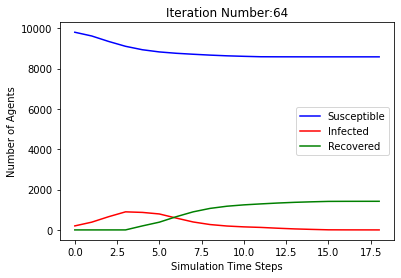

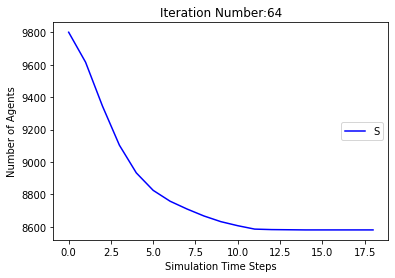

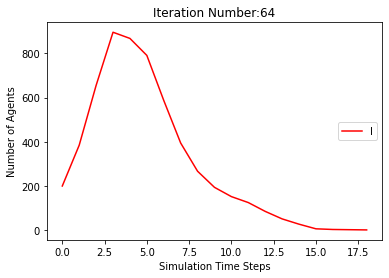

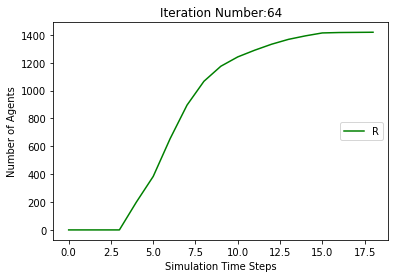

[9801, 9623, 9359, 9089, 8886, 8761, 8648, 8561, 8504, 8459, 8410, 8366, 8328, 8305, 8297, 8293, 8291, 8290, 8288, 8287, 8287, 8287, 8287, 8287]
[199, 377, 641, 911, 915, 862, 711, 528, 382, 302, 238, 195, 176, 154, 113, 73, 37, 15, 9, 6, 4, 3, 1, 0]
[0, 0, 0, 0, 199, 377, 641, 911, 1114, 1239, 1352, 1439, 1496, 1541, 1590, 1634, 1672, 1695, 1703, 1707, 1709, 1710, 1712, 1713]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 

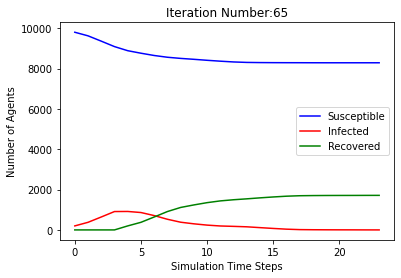

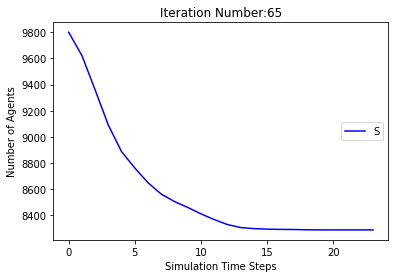

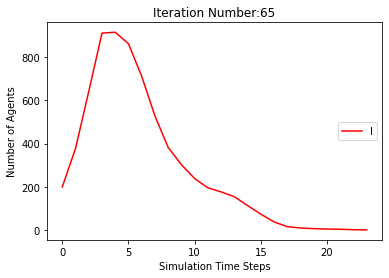

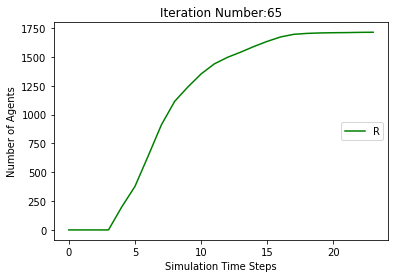

[9801, 9608, 9360, 9100, 8909, 8825, 8754, 8709, 8674, 8656, 8630, 8607, 8588, 8577, 8565, 8558, 8554, 8553, 8553, 8553, 8552, 8550, 8548, 8544, 8544, 8544, 8544, 8544]
[199, 392, 640, 900, 892, 783, 606, 391, 235, 169, 124, 102, 86, 79, 65, 49, 34, 24, 12, 5, 2, 3, 5, 9, 8, 6, 4, 0]
[0, 0, 0, 0, 199, 392, 640, 900, 1091, 1175, 1246, 1291, 1326, 1344, 1370, 1393, 1412, 1423, 1435, 1442, 1446, 1447, 1447, 1447, 1448, 1450, 1452, 1456]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441

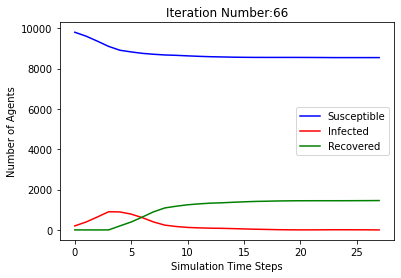

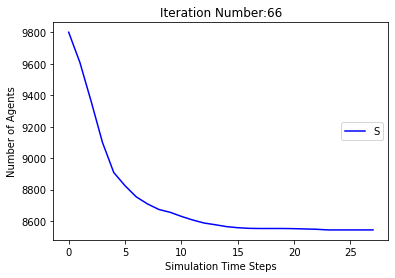

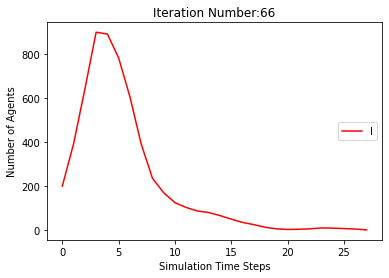

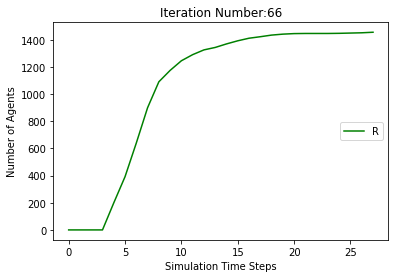

[9801, 9620, 9377, 9099, 8884, 8762, 8676, 8619, 8568, 8521, 8499, 8475, 8462, 8449, 8442, 8440, 8440, 8440, 8440, 8440]
[199, 380, 623, 901, 917, 858, 701, 480, 316, 241, 177, 144, 106, 72, 57, 35, 22, 9, 2, 0]
[0, 0, 0, 0, 199, 380, 623, 901, 1116, 1238, 1324, 1381, 1432, 1479, 1501, 1525, 1538, 1551, 1558, 1560]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 812

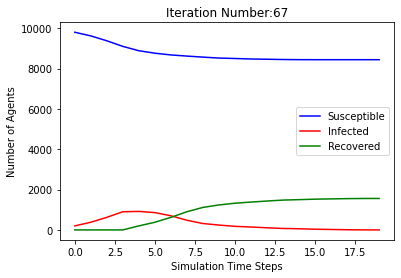

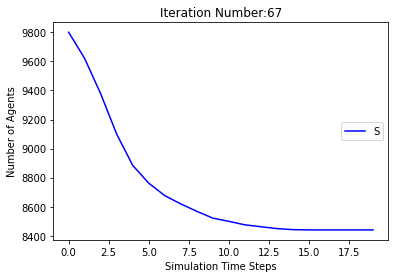

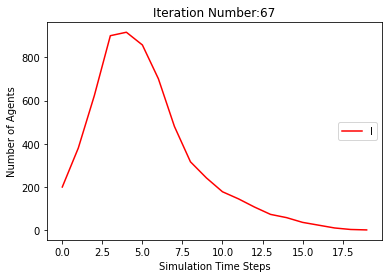

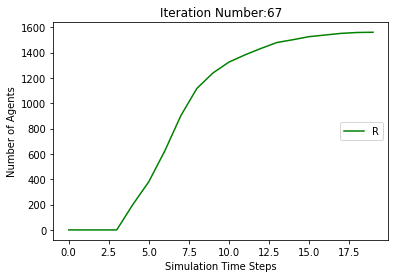

[9801, 9618, 9344, 9121, 8947, 8854, 8780, 8731, 8693, 8674, 8660, 8650, 8641, 8633, 8630, 8629, 8628, 8628, 8628, 8628, 8628]
[199, 382, 656, 879, 854, 764, 564, 390, 254, 180, 120, 81, 52, 41, 30, 21, 13, 5, 2, 1, 0]
[0, 0, 0, 0, 199, 382, 656, 879, 1053, 1146, 1220, 1269, 1307, 1326, 1340, 1350, 1359, 1367, 1370, 1371, 1372]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 81

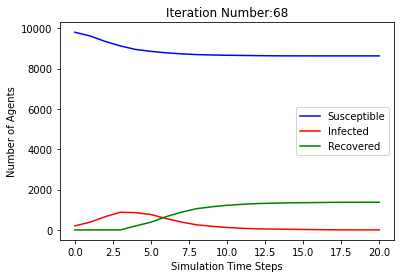

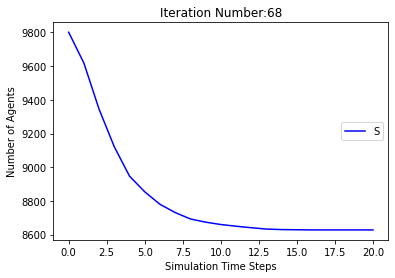

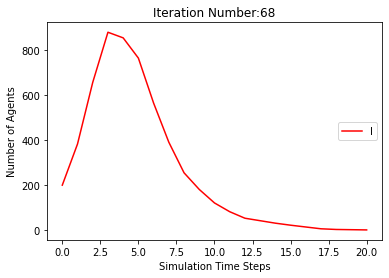

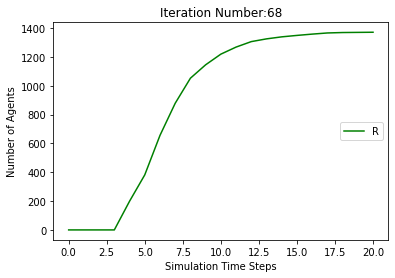

[9801, 9590, 9340, 9097, 8902, 8790, 8704, 8612, 8532, 8447, 8370, 8316, 8286, 8267, 8250, 8243, 8228, 8217, 8203, 8193, 8187, 8185, 8184, 8184, 8184, 8184, 8184]
[199, 410, 660, 903, 899, 800, 636, 485, 370, 343, 334, 296, 246, 180, 120, 73, 58, 50, 47, 50, 41, 32, 19, 9, 3, 1, 0]
[0, 0, 0, 0, 199, 410, 660, 903, 1098, 1210, 1296, 1388, 1468, 1553, 1630, 1684, 1714, 1733, 1750, 1757, 1772, 1783, 1797, 1807, 1813, 1815, 1816]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441],

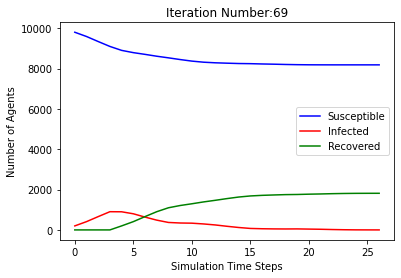

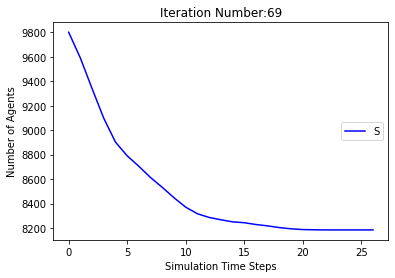

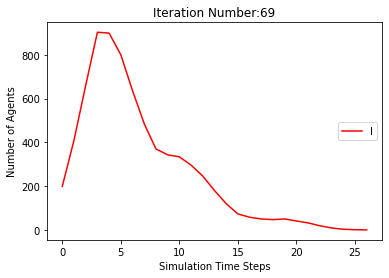

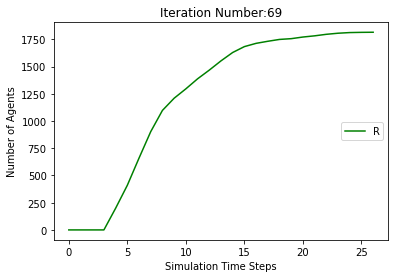

[9801, 9621, 9381, 9118, 8919, 8797, 8702, 8628, 8552, 8487, 8435, 8386, 8342, 8316, 8293, 8280, 8269, 8257, 8246, 8244, 8238, 8234, 8226, 8223, 8219, 8216, 8216, 8216, 8216, 8216]
[199, 379, 619, 882, 882, 824, 679, 490, 367, 310, 267, 242, 210, 171, 142, 106, 73, 59, 47, 36, 31, 23, 20, 21, 19, 18, 10, 7, 3, 0]
[0, 0, 0, 0, 199, 379, 619, 882, 1081, 1203, 1298, 1372, 1448, 1513, 1565, 1614, 1658, 1684, 1707, 1720, 1731, 1743, 1754, 1756, 1762, 1766, 1774, 1777, 1781, 1784]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448

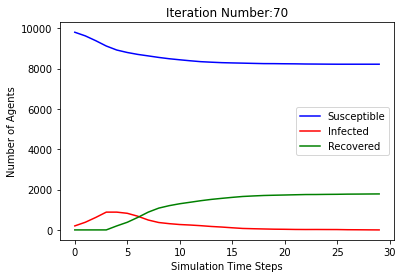

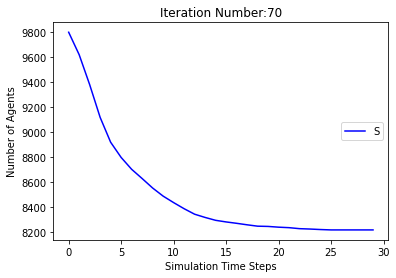

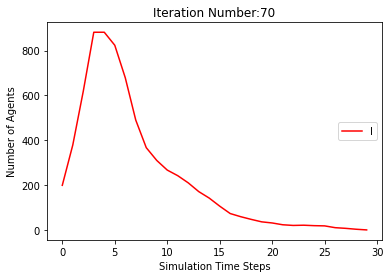

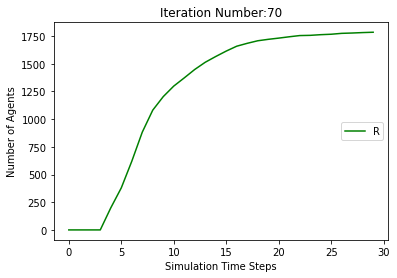

[9801, 9600, 9355, 9112, 8902, 8781, 8703, 8637, 8578, 8524, 8487, 8450, 8411, 8392, 8381, 8364, 8348, 8340, 8336, 8332, 8331, 8326, 8326, 8326, 8326, 8326]
[199, 400, 645, 888, 899, 819, 652, 475, 324, 257, 216, 187, 167, 132, 106, 86, 63, 52, 45, 32, 17, 14, 10, 6, 5, 0]
[0, 0, 0, 0, 199, 400, 645, 888, 1098, 1219, 1297, 1363, 1422, 1476, 1513, 1550, 1589, 1608, 1619, 1636, 1652, 1660, 1664, 1668, 1669, 1674]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9

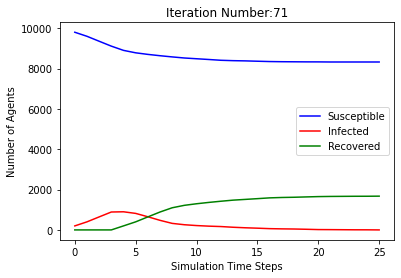

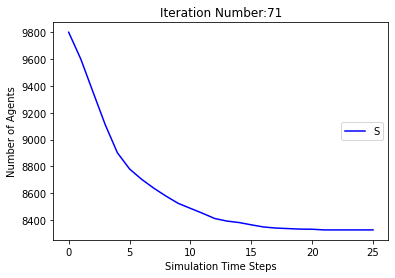

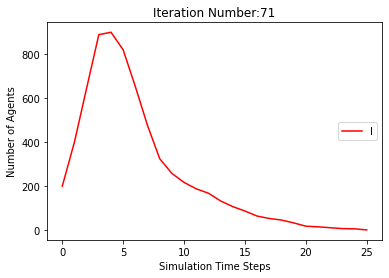

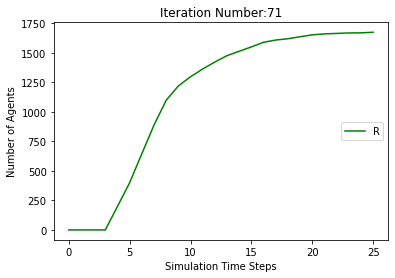

[9801, 9601, 9342, 9093, 8903, 8802, 8728, 8655, 8603, 8560, 8517, 8480, 8468, 8462, 8462, 8459, 8459, 8459, 8458, 8458, 8458, 8457, 8457, 8457, 8457, 8457]
[199, 399, 658, 907, 898, 799, 614, 438, 300, 242, 211, 175, 135, 98, 55, 21, 9, 3, 4, 1, 1, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 399, 658, 907, 1097, 1198, 1272, 1345, 1397, 1440, 1483, 1520, 1532, 1538, 1538, 1541, 1541, 1541, 1542, 1542, 1542, 1543]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094

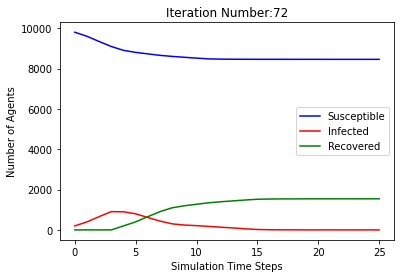

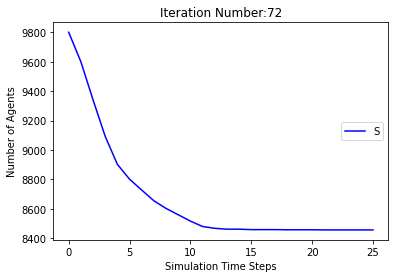

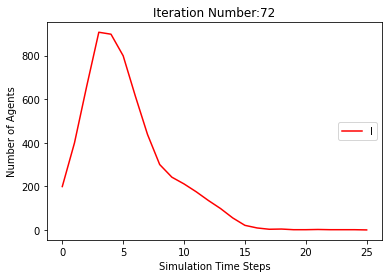

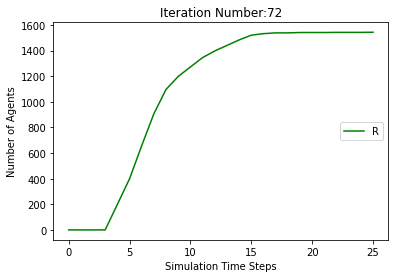

[9801, 9615, 9347, 9095, 8916, 8824, 8764, 8702, 8669, 8649, 8634, 8627, 8617, 8613, 8610, 8610, 8609, 8607, 8607, 8607, 8607, 8607]
[199, 385, 653, 905, 885, 791, 583, 393, 247, 175, 130, 75, 52, 36, 24, 17, 8, 6, 3, 3, 2, 0]
[0, 0, 0, 0, 199, 385, 653, 905, 1084, 1176, 1236, 1298, 1331, 1351, 1366, 1373, 1383, 1387, 1390, 1390, 1391, 1393]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 

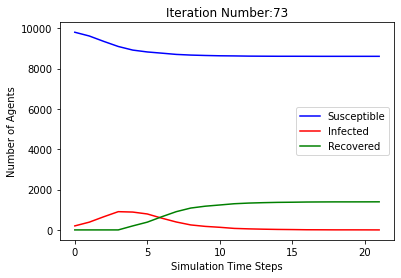

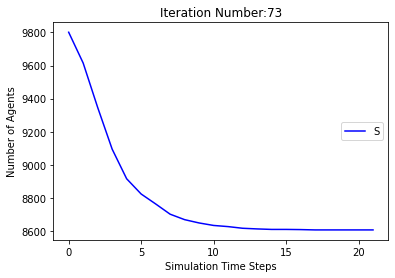

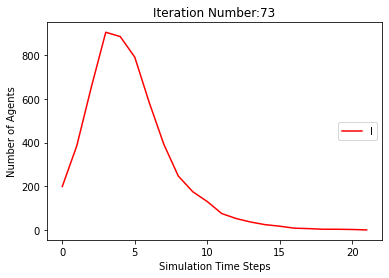

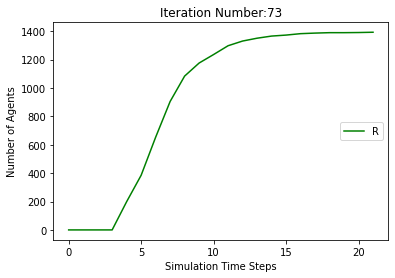

[9801, 9613, 9368, 9122, 8918, 8803, 8726, 8656, 8603, 8566, 8534, 8511, 8500, 8493, 8491, 8491, 8491, 8491, 8491]
[199, 387, 632, 878, 883, 810, 642, 466, 315, 237, 192, 145, 103, 73, 43, 20, 9, 2, 0]
[0, 0, 0, 0, 199, 387, 632, 878, 1082, 1197, 1274, 1344, 1397, 1434, 1466, 1489, 1500, 1507, 1509]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8

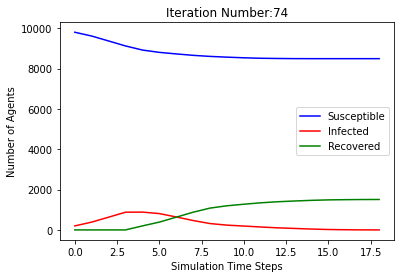

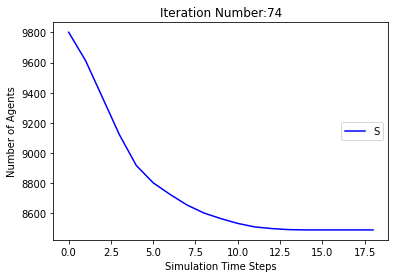

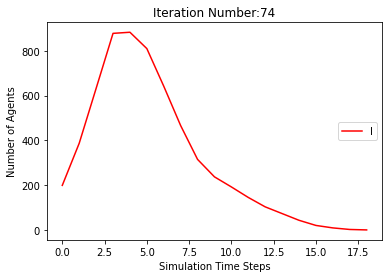

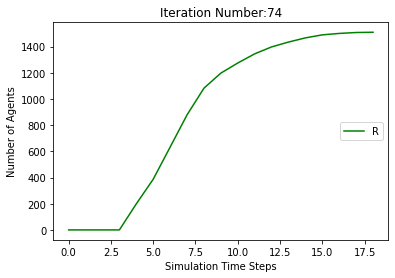

[9801, 9601, 9346, 9110, 8923, 8829, 8762, 8701, 8655, 8616, 8577, 8552, 8531, 8506, 8482, 8466, 8462, 8459, 8459, 8459, 8459, 8459]
[199, 399, 654, 890, 878, 772, 584, 409, 268, 213, 185, 149, 124, 110, 95, 86, 69, 47, 23, 7, 3, 0]
[0, 0, 0, 0, 199, 399, 654, 890, 1077, 1171, 1238, 1299, 1345, 1384, 1423, 1448, 1469, 1494, 1518, 1534, 1538, 1541]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 

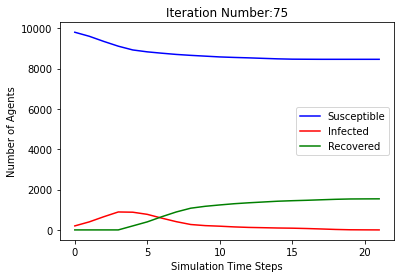

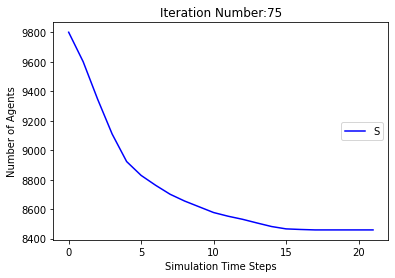

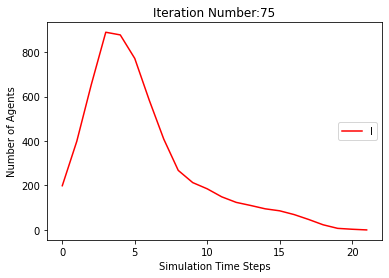

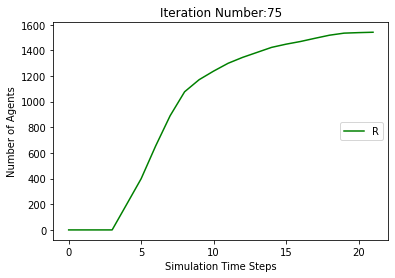

[9801, 9599, 9334, 9092, 8896, 8798, 8714, 8617, 8535, 8454, 8385, 8334, 8291, 8272, 8262, 8255, 8250, 8246, 8244, 8243, 8243, 8242, 8242, 8242, 8242, 8241, 8241, 8241, 8241, 8241]
[199, 401, 666, 908, 905, 801, 620, 475, 361, 344, 329, 283, 244, 182, 123, 79, 41, 26, 18, 12, 7, 4, 2, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 401, 666, 908, 1104, 1202, 1286, 1383, 1465, 1546, 1615, 1666, 1709, 1728, 1738, 1745, 1750, 1754, 1756, 1757, 1757, 1758, 1758, 1758, 1758, 1759]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 

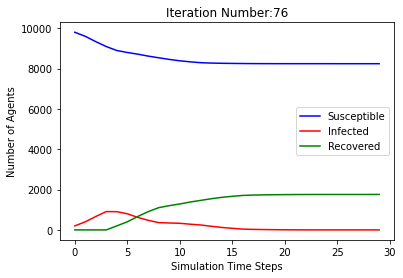

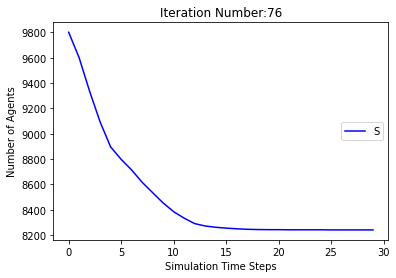

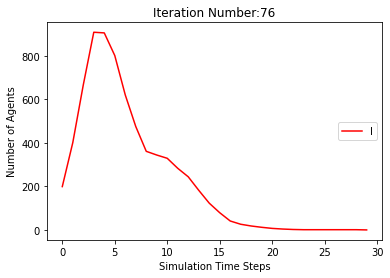

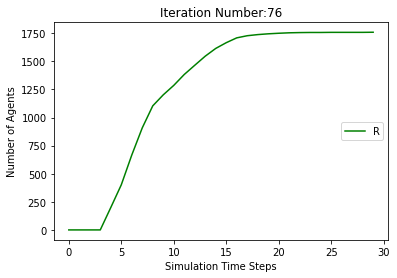

[9801, 9623, 9360, 9101, 8926, 8836, 8762, 8698, 8646, 8602, 8569, 8544, 8516, 8497, 8479, 8466, 8460, 8458, 8458, 8458, 8458, 8458]
[199, 377, 640, 899, 875, 787, 598, 403, 280, 234, 193, 154, 130, 105, 90, 78, 56, 39, 21, 8, 2, 0]
[0, 0, 0, 0, 199, 377, 640, 899, 1074, 1164, 1238, 1302, 1354, 1398, 1431, 1456, 1484, 1503, 1521, 1534, 1540, 1542]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 

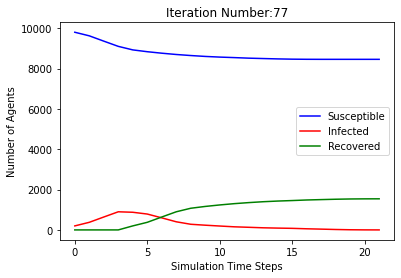

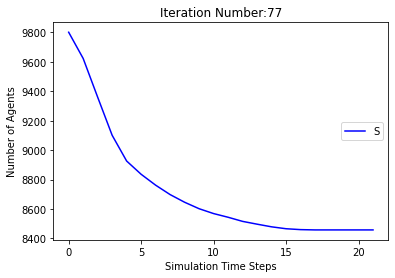

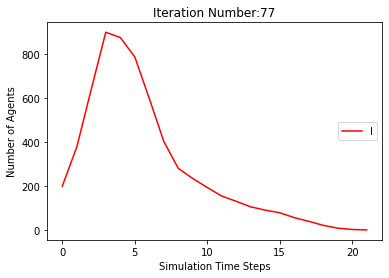

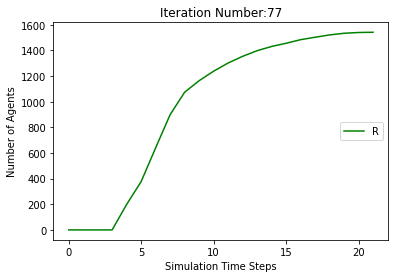

[9801, 9626, 9374, 9115, 8947, 8840, 8755, 8696, 8648, 8617, 8591, 8573, 8564, 8563, 8558, 8557, 8557, 8557, 8557, 8556, 8556, 8556, 8556, 8556]
[199, 374, 626, 885, 854, 786, 619, 419, 299, 223, 164, 123, 84, 54, 33, 16, 7, 6, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 199, 374, 626, 885, 1053, 1160, 1245, 1304, 1352, 1383, 1409, 1427, 1436, 1437, 1442, 1443, 1443, 1443, 1443, 1444]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457,

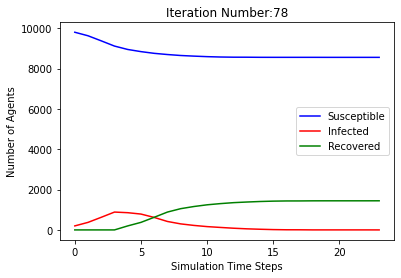

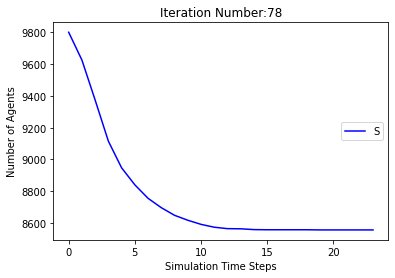

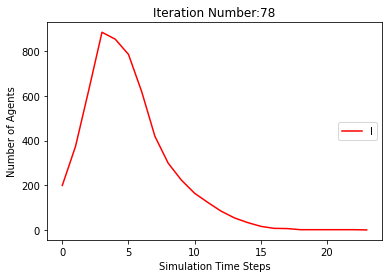

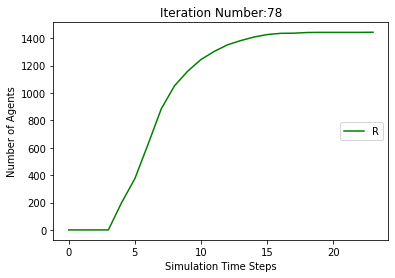

[9801, 9623, 9370, 9118, 8927, 8816, 8748, 8699, 8654, 8623, 8603, 8589, 8580, 8573, 8568, 8568, 8565, 8563, 8562, 8562, 8562, 8562, 8562]
[199, 377, 630, 882, 874, 807, 622, 419, 273, 193, 145, 110, 74, 50, 35, 21, 15, 10, 6, 6, 3, 1, 0]
[0, 0, 0, 0, 199, 377, 630, 882, 1073, 1184, 1252, 1301, 1346, 1377, 1397, 1411, 1420, 1427, 1432, 1432, 1435, 1437, 1438]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 

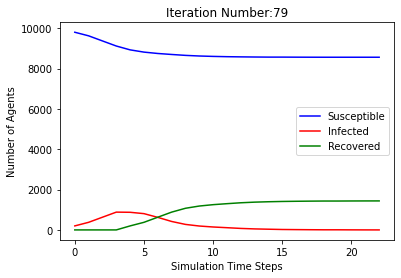

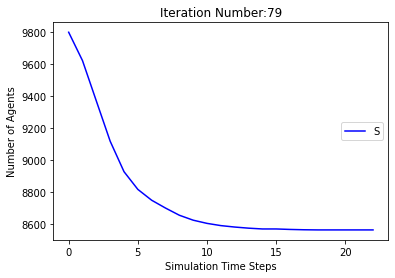

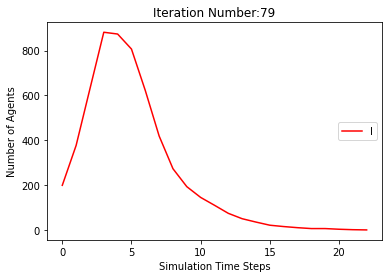

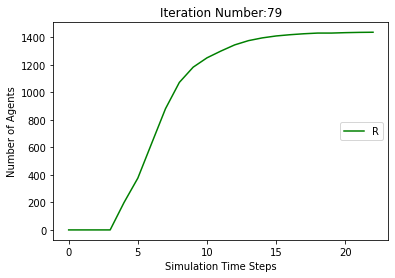

[9801, 9598, 9316, 9068, 8901, 8816, 8755, 8711, 8665, 8636, 8608, 8573, 8555, 8543, 8536, 8531, 8527, 8521, 8513, 8511, 8511, 8511, 8511, 8511]
[199, 402, 684, 932, 900, 782, 561, 357, 236, 180, 147, 138, 110, 93, 72, 42, 28, 22, 23, 20, 16, 10, 2, 0]
[0, 0, 0, 0, 199, 402, 684, 932, 1099, 1184, 1245, 1289, 1335, 1364, 1392, 1427, 1445, 1457, 1464, 1469, 1473, 1479, 1487, 1489]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545

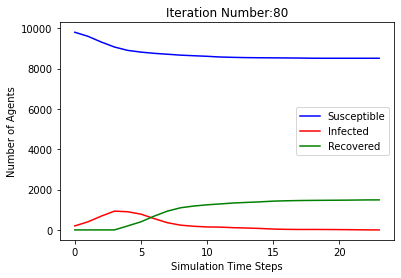

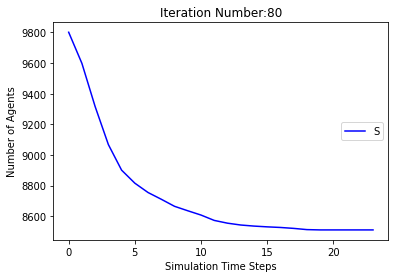

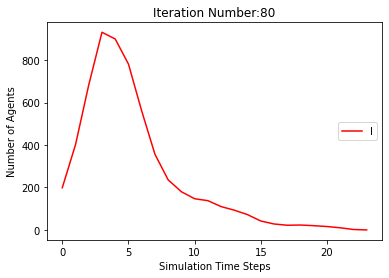

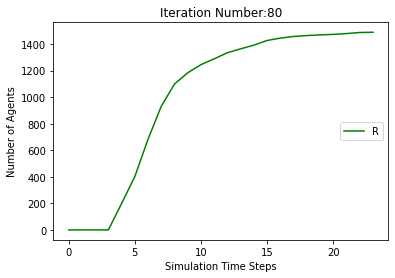

[9801, 9597, 9338, 9081, 8896, 8803, 8726, 8662, 8601, 8562, 8534, 8511, 8493, 8474, 8461, 8458, 8454, 8454, 8454, 8454, 8454]
[199, 403, 662, 919, 905, 794, 612, 419, 295, 241, 192, 151, 108, 88, 73, 53, 39, 20, 7, 4, 0]
[0, 0, 0, 0, 199, 403, 662, 919, 1104, 1197, 1274, 1338, 1399, 1438, 1466, 1489, 1507, 1526, 1539, 1542, 1546]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172,

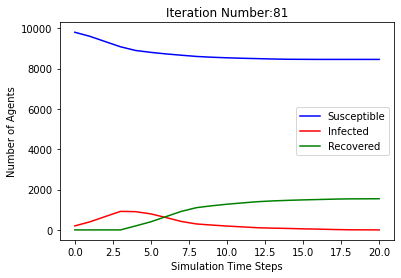

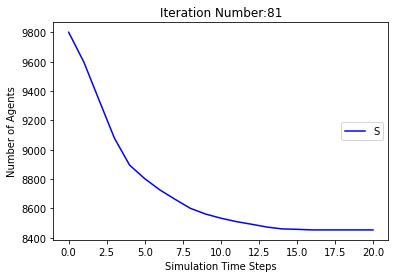

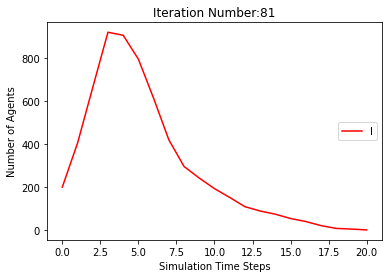

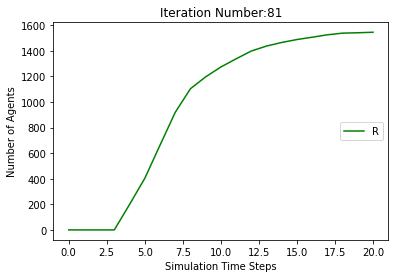

[9801, 9622, 9359, 9087, 8873, 8719, 8596, 8509, 8443, 8382, 8332, 8290, 8260, 8237, 8224, 8218, 8210, 8208, 8206, 8205, 8204, 8204, 8204, 8204, 8204]
[199, 378, 641, 913, 928, 903, 763, 578, 430, 337, 264, 219, 183, 145, 108, 72, 50, 29, 18, 13, 6, 4, 2, 1, 0]
[0, 0, 0, 0, 199, 378, 641, 913, 1127, 1281, 1404, 1491, 1557, 1618, 1668, 1710, 1740, 1763, 1776, 1782, 1790, 1792, 1794, 1795, 1796]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8

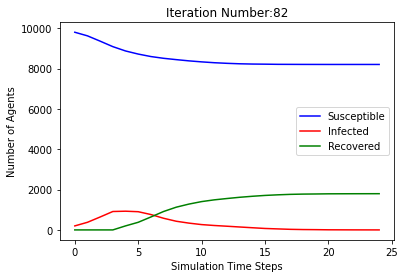

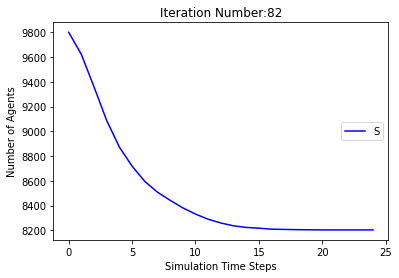

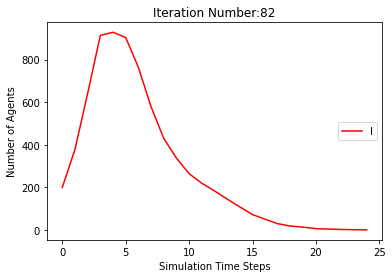

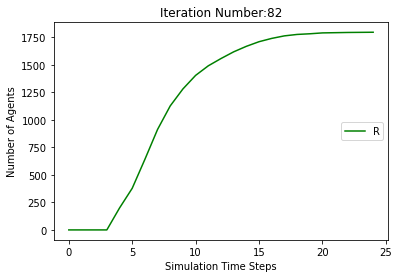

[9801, 9612, 9338, 9097, 8911, 8800, 8706, 8618, 8528, 8480, 8427, 8392, 8368, 8341, 8321, 8306, 8299, 8290, 8287, 8286, 8284, 8282, 8281, 8281, 8281, 8281, 8281]
[199, 388, 662, 903, 890, 812, 632, 479, 383, 320, 279, 226, 160, 139, 106, 86, 69, 51, 34, 20, 15, 8, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 199, 388, 662, 903, 1089, 1200, 1294, 1382, 1472, 1520, 1573, 1608, 1632, 1659, 1679, 1694, 1701, 1710, 1713, 1714, 1716, 1718, 1719]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [

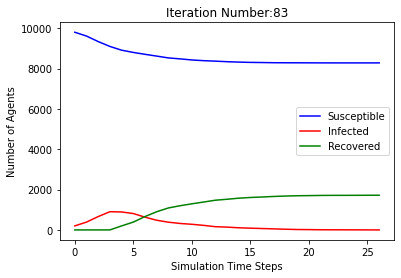

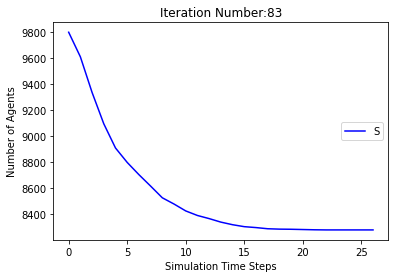

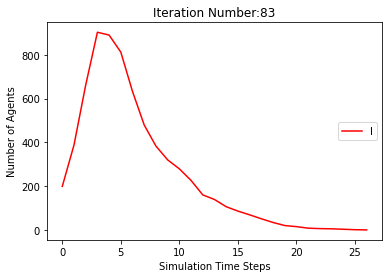

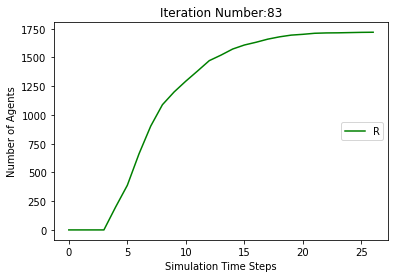

[9801, 9604, 9346, 9124, 8957, 8871, 8761, 8684, 8621, 8577, 8533, 8504, 8483, 8475, 8467, 8466, 8463, 8457, 8452, 8451, 8449, 8449, 8448, 8448, 8448, 8448, 8448]
[199, 396, 654, 876, 844, 733, 585, 440, 336, 294, 228, 180, 138, 102, 66, 38, 20, 18, 15, 15, 14, 8, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 199, 396, 654, 876, 1043, 1129, 1239, 1316, 1379, 1423, 1467, 1496, 1517, 1525, 1533, 1534, 1537, 1543, 1548, 1549, 1551, 1551, 1552]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9

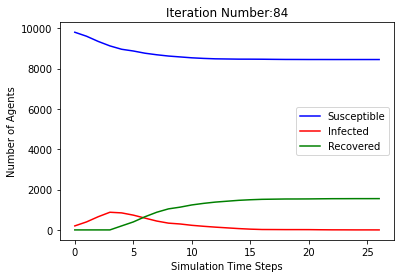

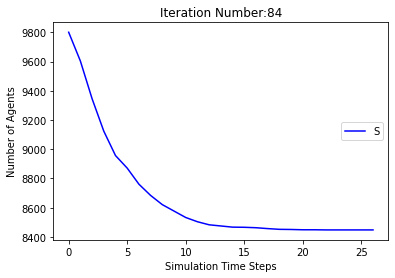

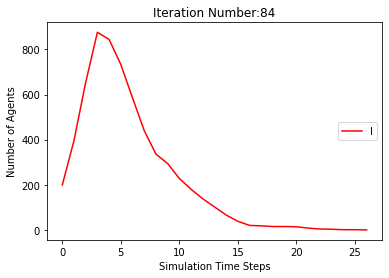

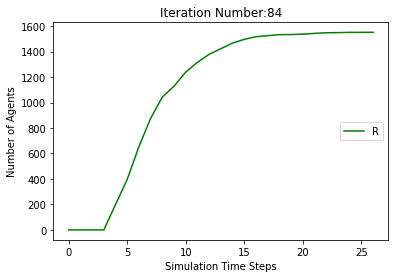

[9801, 9609, 9359, 9105, 8913, 8826, 8755, 8702, 8655, 8620, 8590, 8561, 8542, 8531, 8526, 8526, 8525, 8523, 8523, 8523, 8523, 8523]
[199, 391, 641, 895, 888, 783, 604, 403, 258, 206, 165, 141, 113, 89, 64, 35, 17, 8, 3, 3, 2, 0]
[0, 0, 0, 0, 199, 391, 641, 895, 1087, 1174, 1245, 1298, 1345, 1380, 1410, 1439, 1458, 1469, 1474, 1474, 1475, 1477]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 821

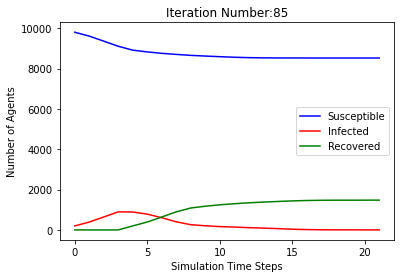

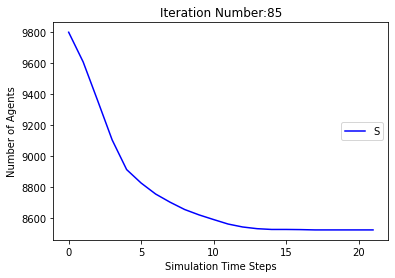

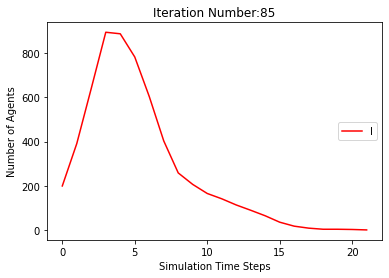

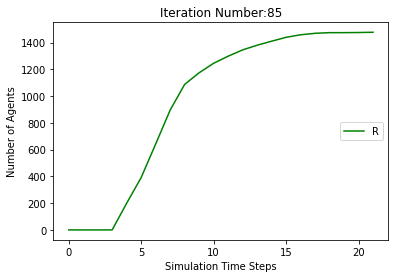

[9801, 9610, 9350, 9115, 8926, 8833, 8751, 8683, 8618, 8567, 8514, 8482, 8466, 8440, 8430, 8422, 8418, 8413, 8412, 8411, 8409, 8407, 8407, 8407, 8407, 8407]
[199, 390, 650, 885, 875, 777, 599, 432, 308, 266, 237, 201, 152, 127, 84, 60, 48, 27, 18, 11, 9, 6, 5, 4, 2, 0]
[0, 0, 0, 0, 199, 390, 650, 885, 1074, 1167, 1249, 1317, 1382, 1433, 1486, 1518, 1534, 1560, 1570, 1578, 1582, 1587, 1588, 1589, 1591, 1593]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356,

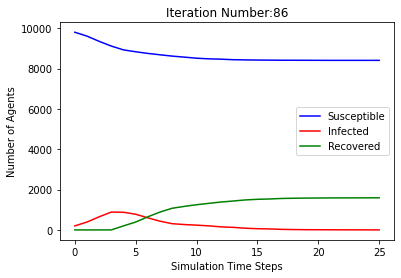

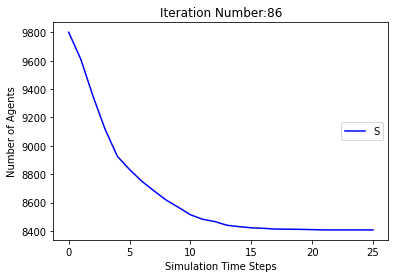

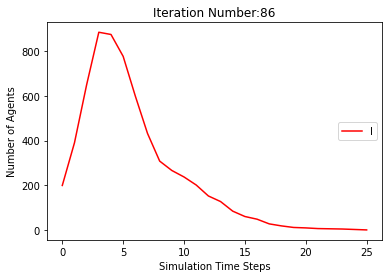

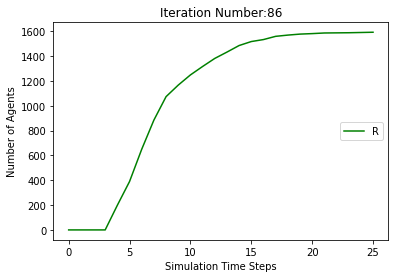

[9801, 9605, 9338, 9066, 8905, 8828, 8769, 8720, 8676, 8645, 8627, 8604, 8587, 8572, 8562, 8556, 8554, 8553, 8551, 8550, 8549, 8549, 8549, 8549, 8549]
[199, 395, 662, 934, 896, 777, 569, 346, 229, 183, 142, 116, 89, 73, 65, 48, 33, 19, 11, 6, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 199, 395, 662, 934, 1095, 1172, 1231, 1280, 1324, 1355, 1373, 1396, 1413, 1428, 1438, 1444, 1446, 1447, 1449, 1450, 1451]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768,

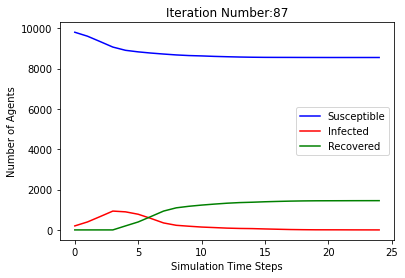

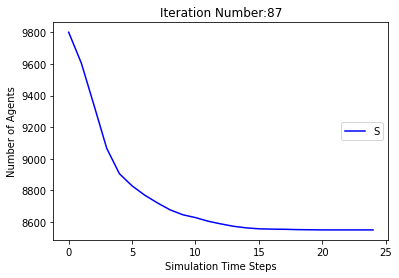

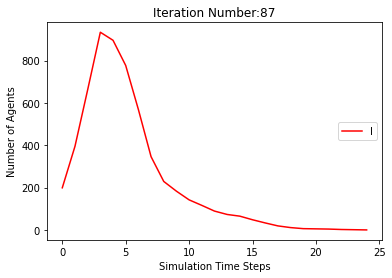

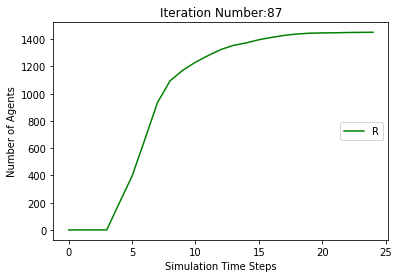

[9801, 9634, 9403, 9146, 8945, 8821, 8727, 8667, 8624, 8596, 8561, 8525, 8498, 8480, 8469, 8465, 8460, 8459, 8459, 8458, 8458, 8458, 8458, 8458]
[199, 366, 597, 854, 856, 813, 676, 479, 321, 225, 166, 142, 126, 116, 92, 60, 38, 21, 10, 7, 2, 1, 1, 0]
[0, 0, 0, 0, 199, 366, 597, 854, 1055, 1179, 1273, 1333, 1376, 1404, 1439, 1475, 1502, 1520, 1531, 1535, 1540, 1541, 1541, 1542]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 

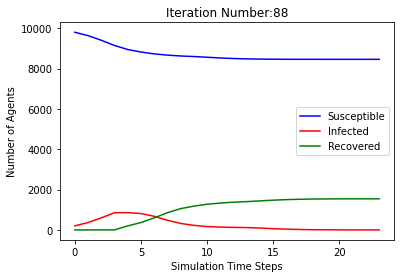

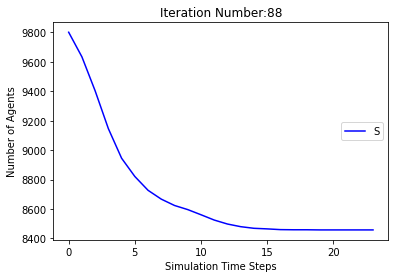

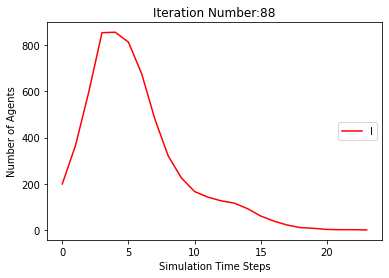

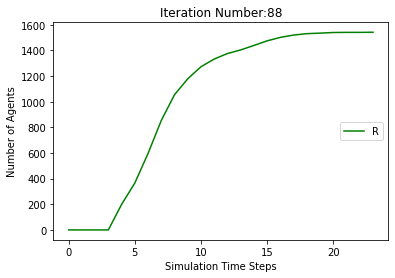

[9801, 9616, 9370, 9134, 8965, 8854, 8768, 8717, 8678, 8649, 8628, 8612, 8605, 8600, 8599, 8598, 8598, 8598, 8598, 8598]
[199, 384, 630, 866, 836, 762, 602, 417, 287, 205, 140, 105, 73, 49, 29, 14, 7, 2, 1, 0]
[0, 0, 0, 0, 199, 384, 630, 866, 1035, 1146, 1232, 1283, 1322, 1351, 1372, 1388, 1395, 1400, 1401, 1402]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126,

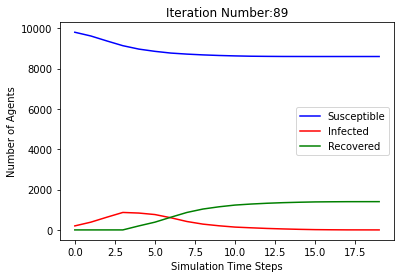

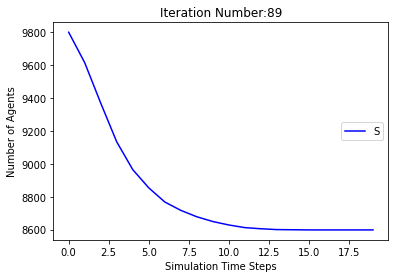

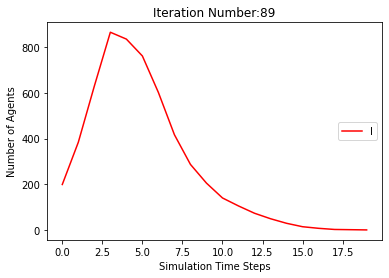

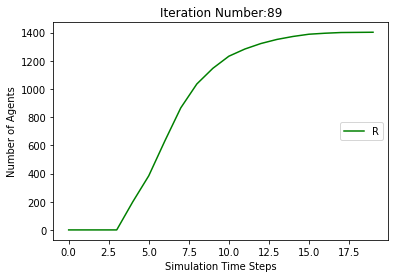

[9801, 9593, 9323, 9088, 8919, 8821, 8759, 8705, 8667, 8621, 8597, 8566, 8545, 8538, 8533, 8532, 8529, 8528, 8526, 8523, 8523, 8522, 8522, 8522, 8522, 8522]
[199, 407, 677, 912, 882, 772, 564, 383, 252, 200, 162, 139, 122, 83, 64, 34, 16, 10, 7, 9, 6, 6, 4, 1, 1, 0]
[0, 0, 0, 0, 199, 407, 677, 912, 1081, 1179, 1241, 1295, 1333, 1379, 1403, 1434, 1455, 1462, 1467, 1468, 1471, 1472, 1474, 1477, 1477, 1478]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 90

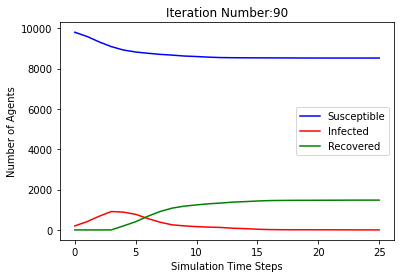

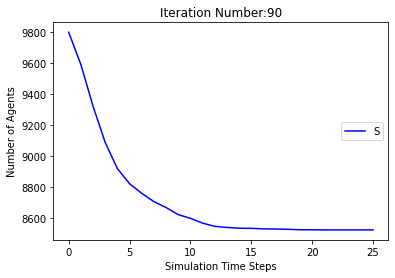

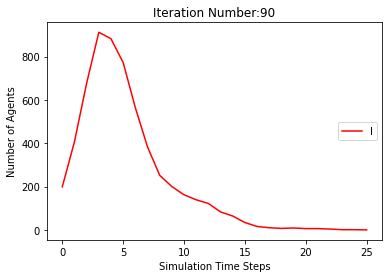

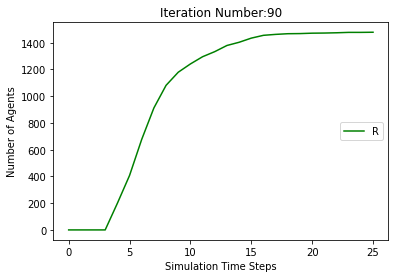

[9801, 9618, 9373, 9115, 8935, 8833, 8780, 8722, 8686, 8657, 8643, 8632, 8624, 8616, 8607, 8603, 8602, 8602, 8602, 8602, 8602]
[199, 382, 627, 885, 866, 785, 593, 393, 249, 176, 137, 90, 62, 41, 36, 29, 22, 14, 5, 1, 0]
[0, 0, 0, 0, 199, 382, 627, 885, 1065, 1167, 1220, 1278, 1314, 1343, 1357, 1368, 1376, 1384, 1393, 1397, 1398]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8

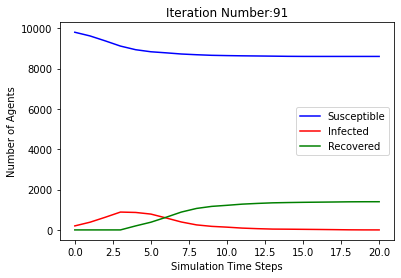

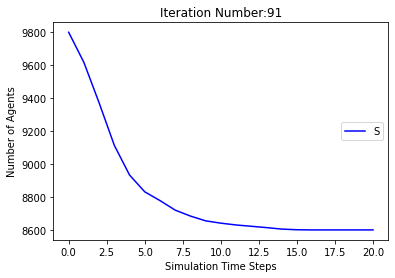

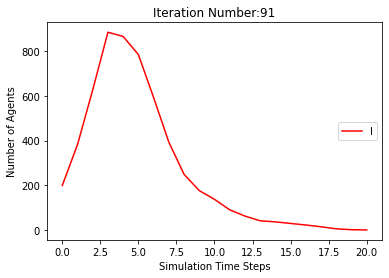

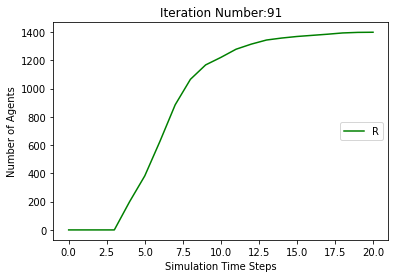

[9801, 9600, 9335, 9094, 8907, 8788, 8685, 8614, 8539, 8457, 8406, 8348, 8311, 8278, 8259, 8239, 8226, 8221, 8205, 8194, 8185, 8179, 8178, 8176, 8173, 8171, 8169, 8169, 8169, 8169, 8169]
[199, 400, 665, 906, 894, 812, 650, 480, 368, 331, 279, 266, 228, 179, 147, 109, 85, 57, 54, 45, 41, 42, 27, 18, 12, 8, 9, 7, 4, 2, 0]
[0, 0, 0, 0, 199, 400, 665, 906, 1093, 1212, 1315, 1386, 1461, 1543, 1594, 1652, 1689, 1722, 1741, 1761, 1774, 1779, 1795, 1806, 1815, 1821, 1822, 1824, 1827, 1829, 1831]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 845

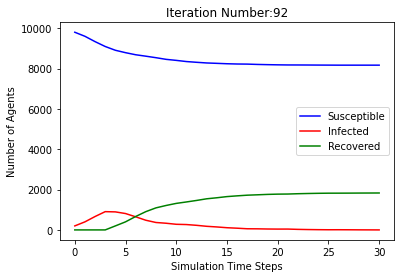

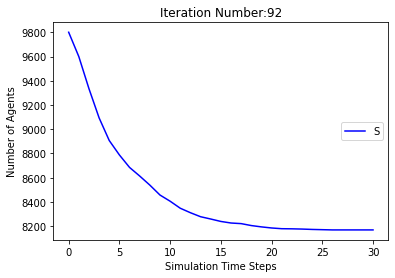

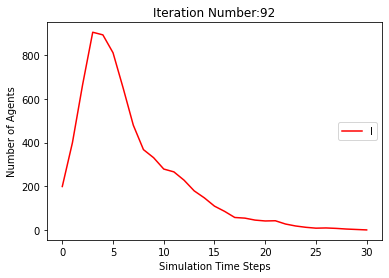

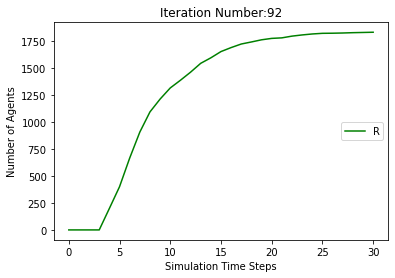

[9801, 9590, 9313, 9061, 8900, 8805, 8732, 8679, 8632, 8592, 8548, 8521, 8505, 8488, 8481, 8476, 8471, 8470, 8469, 8469, 8469, 8469, 8469]
[199, 410, 687, 939, 901, 785, 581, 382, 268, 213, 184, 158, 127, 104, 67, 45, 34, 18, 12, 7, 2, 1, 0]
[0, 0, 0, 0, 199, 410, 687, 939, 1100, 1195, 1268, 1321, 1368, 1408, 1452, 1479, 1495, 1512, 1519, 1524, 1529, 1530, 1531]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 832

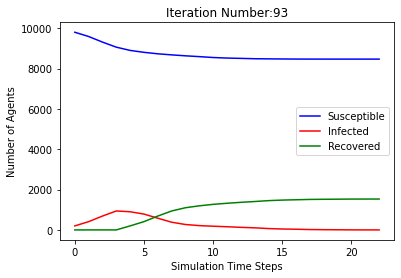

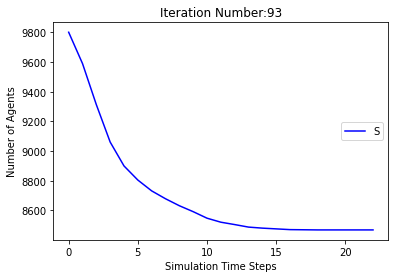

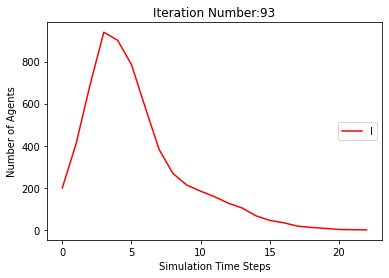

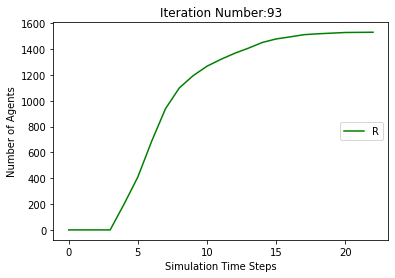

[9801, 9615, 9359, 9126, 8961, 8870, 8808, 8778, 8756, 8745, 8738, 8731, 8725, 8724, 8723, 8719, 8717, 8712, 8711, 8708, 8707, 8707, 8706, 8706, 8706, 8704, 8703, 8702, 8702, 8701, 8700, 8698, 8698, 8698, 8698, 8698]
[199, 385, 641, 874, 840, 745, 551, 348, 205, 125, 70, 47, 31, 21, 15, 12, 8, 12, 12, 11, 10, 5, 5, 2, 1, 3, 3, 4, 4, 3, 3, 4, 4, 3, 2, 0]
[0, 0, 0, 0, 199, 385, 641, 874, 1039, 1130, 1192, 1222, 1244, 1255, 1262, 1269, 1275, 1276, 1277, 1281, 1283, 1288, 1289, 1292, 1293, 1293, 1294, 1294, 1294, 1296, 1297, 1298, 1298, 1299, 1300, 1302]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064,

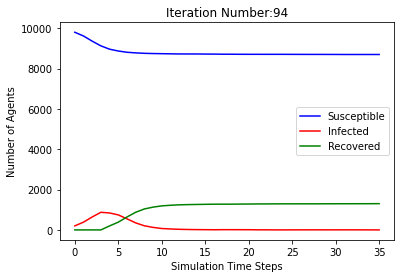

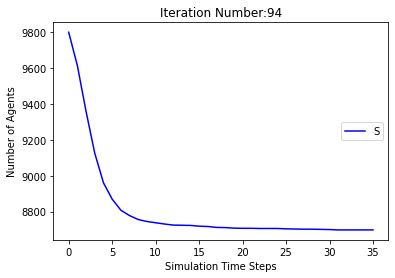

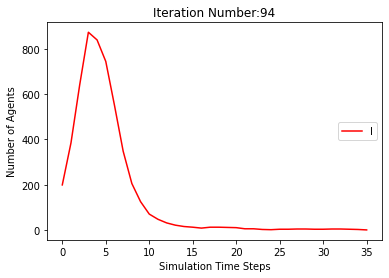

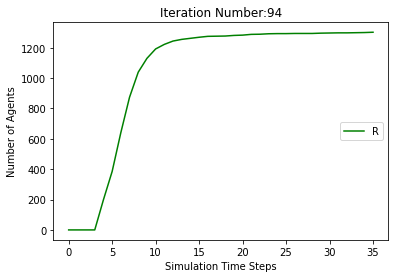

[9801, 9613, 9365, 9137, 8951, 8847, 8779, 8733, 8704, 8668, 8643, 8633, 8622, 8616, 8613, 8607, 8603, 8602, 8602, 8602, 8602, 8602]
[199, 387, 635, 863, 850, 766, 586, 404, 247, 179, 136, 100, 82, 52, 30, 26, 19, 14, 11, 5, 1, 0]
[0, 0, 0, 0, 199, 387, 635, 863, 1049, 1153, 1221, 1267, 1296, 1332, 1357, 1367, 1378, 1384, 1387, 1393, 1397, 1398]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 82

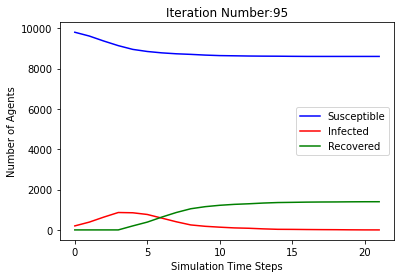

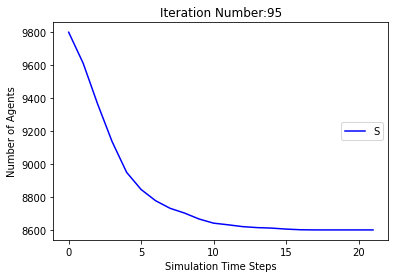

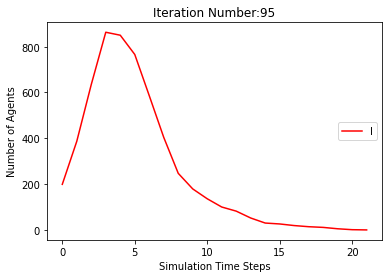

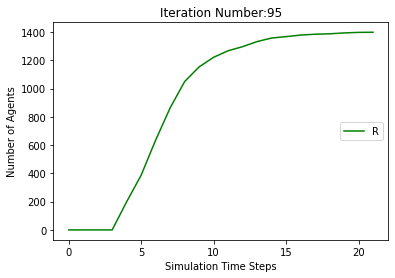

[9801, 9598, 9339, 9084, 8864, 8752, 8660, 8562, 8462, 8390, 8316, 8249, 8190, 8157, 8132, 8109, 8093, 8072, 8056, 8039, 8032, 8029, 8029, 8029, 8029, 8029]
[199, 402, 661, 916, 937, 846, 679, 522, 402, 362, 344, 313, 272, 233, 184, 140, 97, 85, 76, 70, 61, 43, 27, 10, 3, 0]
[0, 0, 0, 0, 199, 402, 661, 916, 1136, 1248, 1340, 1438, 1538, 1610, 1684, 1751, 1810, 1843, 1868, 1891, 1907, 1928, 1944, 1961, 1968, 1971]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629,

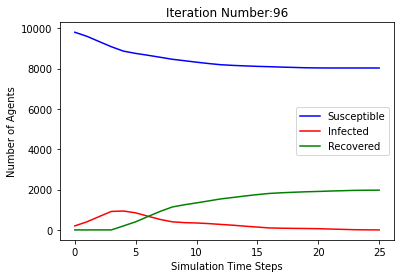

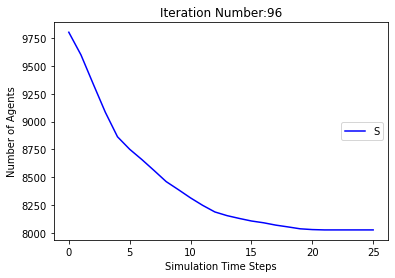

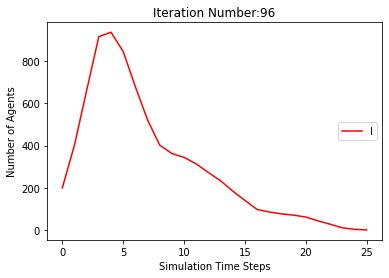

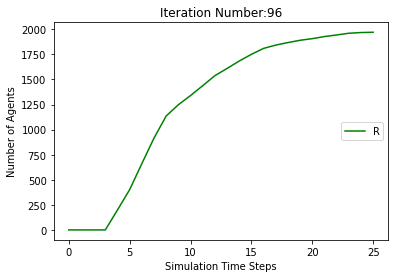

[9801, 9595, 9335, 9082, 8889, 8806, 8745, 8693, 8646, 8612, 8581, 8568, 8563, 8560, 8560, 8560, 8560, 8560]
[199, 405, 665, 918, 912, 789, 590, 389, 243, 194, 164, 125, 83, 52, 21, 8, 3, 0]
[0, 0, 0, 0, 199, 405, 665, 918, 1111, 1194, 1255, 1307, 1354, 1388, 1419, 1432, 1437, 1440]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8098, 8095, 8092, 

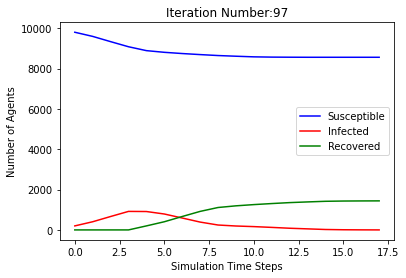

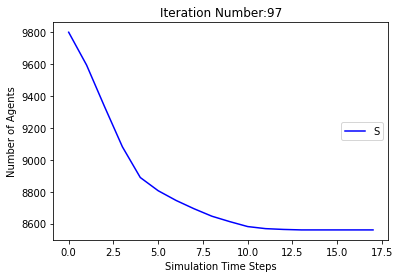

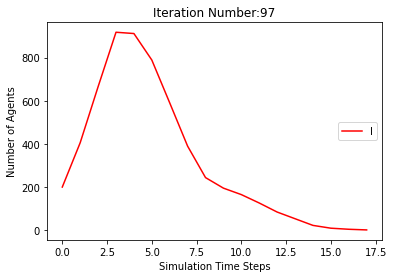

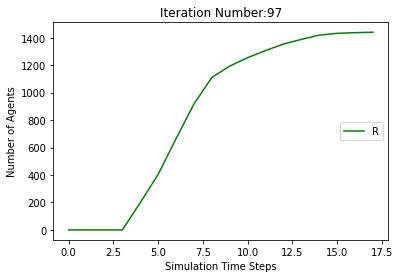

[9801, 9607, 9362, 9081, 8903, 8835, 8772, 8734, 8714, 8704, 8689, 8683, 8682, 8682, 8682, 8682, 8682]
[199, 393, 638, 919, 898, 772, 590, 347, 189, 131, 83, 51, 32, 22, 7, 1, 0]
[0, 0, 0, 0, 199, 393, 638, 919, 1097, 1165, 1228, 1266, 1286, 1296, 1311, 1317, 1318]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213, 8189, 8172, 8151, 8136, 8126, 8116, 8107, 8098, 8095, 8092, 8091, 8088, 8087, 

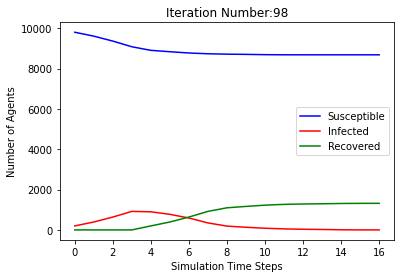

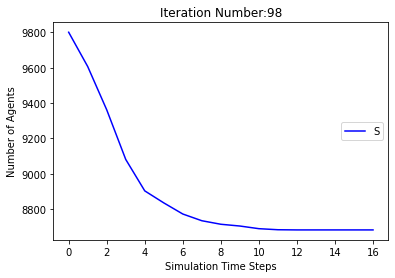

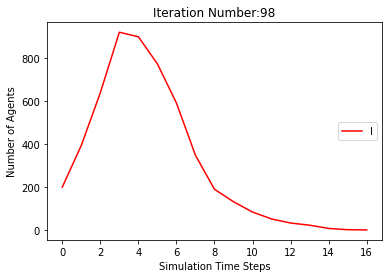

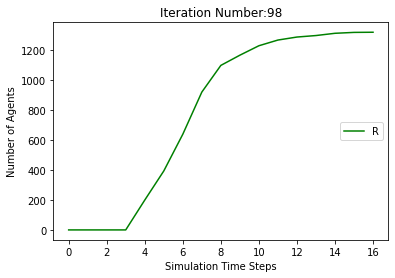

[9801, 9625, 9368, 9140, 8969, 8863, 8797, 8740, 8695, 8660, 8635, 8620, 8607, 8601, 8598, 8597, 8596, 8593, 8593, 8593, 8593, 8593]
[199, 375, 632, 860, 832, 762, 571, 400, 274, 203, 162, 120, 88, 59, 37, 23, 11, 8, 5, 4, 3, 0]
[0, 0, 0, 0, 199, 375, 632, 860, 1031, 1137, 1203, 1260, 1305, 1340, 1365, 1380, 1393, 1399, 1402, 1403, 1404, 1407]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 8213

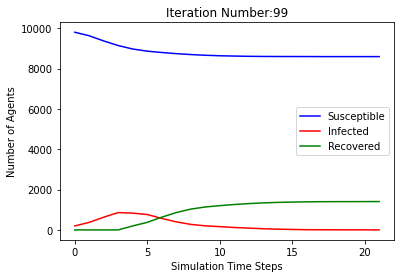

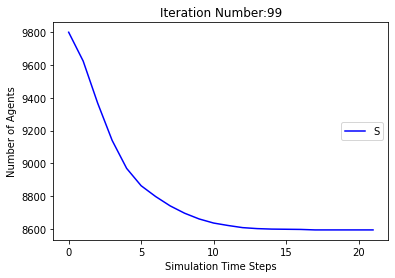

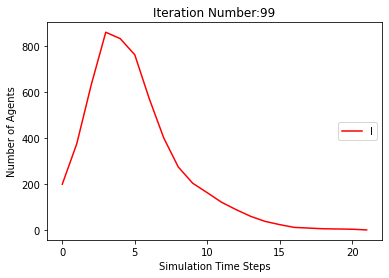

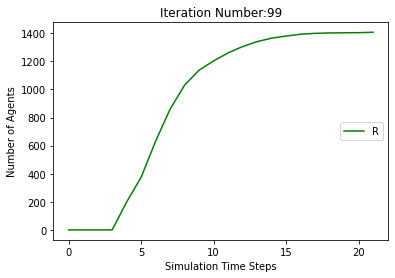

[9801, 9615, 9385, 9144, 8967, 8850, 8772, 8698, 8637, 8585, 8541, 8509, 8481, 8473, 8470, 8467, 8466, 8465, 8465, 8465, 8465, 8465]
[199, 385, 615, 856, 834, 765, 613, 446, 330, 265, 231, 189, 156, 112, 71, 42, 15, 8, 5, 2, 1, 0]
[0, 0, 0, 0, 199, 385, 615, 856, 1033, 1150, 1228, 1302, 1363, 1415, 1459, 1491, 1519, 1527, 1530, 1533, 1534, 1535]
[[], [9801, 9578, 9316, 9074, 8907, 8812, 8712, 8623, 8526, 8458, 8397, 8349, 8325, 8313, 8309, 8306, 8305, 8305, 8305, 8304, 8304, 8304, 8304, 8304], [9801, 9602, 9384, 9132, 8910, 8785, 8681, 8578, 8495, 8424, 8369, 8323, 8287, 8262, 8234, 8216, 8204, 8193, 8190, 8188, 8188, 8188, 8188, 8188], [9801, 9613, 9336, 9072, 8885, 8789, 8704, 8634, 8575, 8529, 8498, 8470, 8461, 8452, 8447, 8445, 8445, 8445, 8445, 8445], [9801, 9603, 9339, 9064, 8895, 8785, 8678, 8597, 8540, 8496, 8481, 8466, 8461, 8458, 8454, 8450, 8448, 8446, 8444, 8442, 8441, 8441, 8441, 8441, 8441], [9801, 9629, 9356, 9094, 8905, 8768, 8649, 8545, 8457, 8376, 8323, 8282, 8247, 82

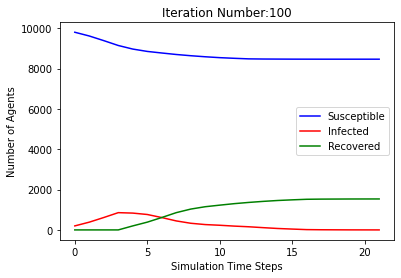

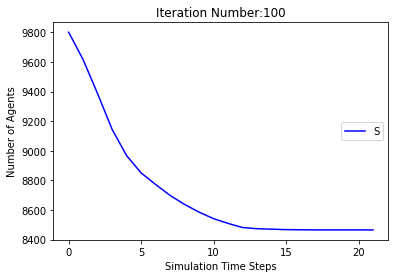

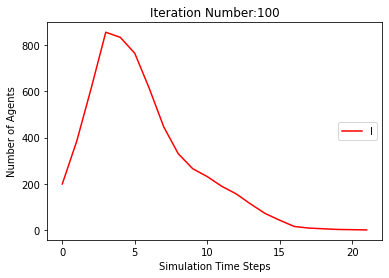

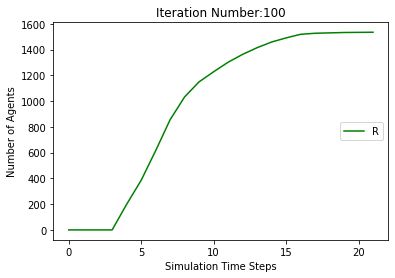

In [10]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

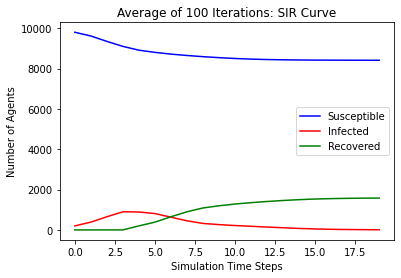

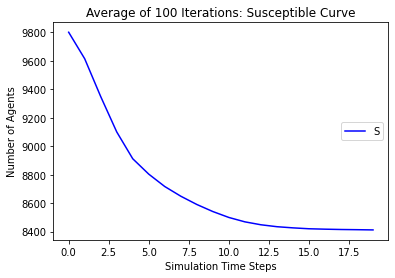

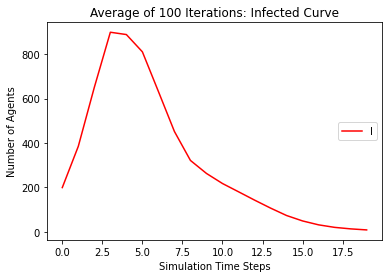

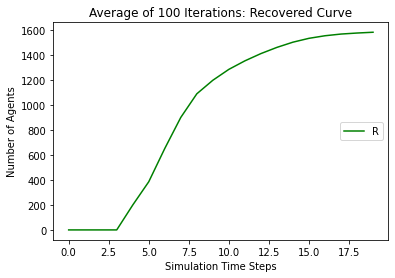

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
